# Project Problem Statement - FMST

## Problem Statement: Concrete Strength Prediction

 

### Objective 

To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

#### Steps and Tasks:

##### Exploratory Data Quality Report Reflecting the Following:
Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates(10 Marks)

Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms, or density curves. (10 marks)

Feature Engineering techniques(10 marks)
Identify opportunities (if any) to extract new features from existing features, drop a feature(if required) Hint: Feature Extraction, for example, consider a dataset with two features length and breadth. From this, we can extract a new feature Area which would be length * breadth.

Get the data model ready and do a train test split.

Decide on the complexity of the model, should it be a simple linear model in terms of parameters or would a quadratic or higher degree.
 

### Creating the Model and Tuning It:
Algorithms that you think will be suitable for this project. Use Kfold Cross-Validation to evaluate model performance. Use appropriate metrics and make a DataFrame to compare models w.r.t their metrics. (at least 3 algorithms, one bagging and one boosting based algorithms have to be there). (15 marks)

Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

## GithubLink

https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-jul20-sannidhisiva/tree/master/FeatureSelections

# 1. Import Libraries 

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#importing seaborn for statistical plots
import seaborn as sns
#importing ploting libraries
import matplotlib.pyplot as plt
#styling figures
plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#importing the feature scaling library
from sklearn.preprocessing import StandardScaler
#Import Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
# Import support vector regressor machine learning library
from sklearn.svm import SVR
#Import the metrics
from sklearn import metrics
#Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
#importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
#importing the K fold
from sklearn.model_selection import KFold
#importing the cross validation score
from sklearn.model_selection import cross_val_score
#importing the preprocessing library
from sklearn import preprocessing
# importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
#importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample



In [2]:
concrete_df=pd.read_csv('concrete.csv')

In [3]:
#Check the first five records 
concrete_df.head()
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


Observation

1. It shows that there are eight independent variables ( cement, slag, ash, water, superplastic, coarseagg, fineagg, age) and one dependent variable (strength).
2. All the records are numeric.

In [4]:
#Check the last few records 
concrete_df.head()

cement   slag    ash  water  superplastic  coarseagg  fineagg  age  \
0   141.3  212.0    0.0  203.5           0.0      971.8    748.5   28   
1   168.9   42.2  124.3  158.3          10.8     1080.8    796.2   14   
2   250.0    0.0   95.7  187.4           5.5      956.9    861.2   28   
3   266.0  114.0    0.0  228.0           0.0      932.0    670.0   28   
4   154.8  183.4    0.0  193.3           9.1     1047.4    696.7   28   

   strength  
0     29.89  
1     23.51  
2     29.22  
3     45.85  
4     18.29

In [5]:
#Info of the dataset
concrete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It gives the details about the number of rows (1030), number of columns (9), data types information i.e. except age which is integer type all other columns are float type. Memory usage is 72.5 KB. Also,there are no null values in the data.


In [6]:
# Data type of the columns 
concrete_df.dtypes

cement          float64
slag            float64
ash             float64
water           float64
superplastic    float64
coarseagg       float64
fineagg         float64
age               int64
strength        float64
dtype: object

It gives the data types of each column of the dataset.


In [7]:
#To get the shape 
concrete_df.shape

(1030, 9)

It gives the details of the number of rows and columns present in the dataset.There are 1030 rows and 9 columns.


In [8]:
#To get the columns name
concrete_df.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

It gives the column names of the dataset.


In [9]:
# Five point summary
concrete_df.describe().T


count        mean         std     min      25%      50%  \
cement        1030.0  281.167864  104.506364  102.00  192.375  272.900   
slag          1030.0   73.895825   86.279342    0.00    0.000   22.000   
ash           1030.0   54.188350   63.997004    0.00    0.000    0.000   
water         1030.0  181.567282   21.354219  121.80  164.900  185.000   
superplastic  1030.0    6.204660    5.973841    0.00    0.000    6.400   
coarseagg     1030.0  972.918932   77.753954  801.00  932.000  968.000   
fineagg       1030.0  773.580485   80.175980  594.00  730.950  779.500   
age           1030.0   45.662136   63.169912    1.00    7.000   28.000   
strength      1030.0   35.817961   16.705742    2.33   23.710   34.445   

                   75%     max  
cement         350.000   540.0  
slag           142.950   359.4  
ash            118.300   200.1  
water          192.000   247.0  
superplastic    10.200    32.2  
coarseagg     1029.400  1145.0  
fineagg        824.000   992.6  
age             56.000   365.0  
strength        46.135    82.6

can see that cement,slag,ash are left skewed

In [10]:
#Creating Profile Report for Analysis
#!pip install pandas_profiling
import pandas_profiling
concrete_df.profile_report()

# Exploratory Data Quality Report 

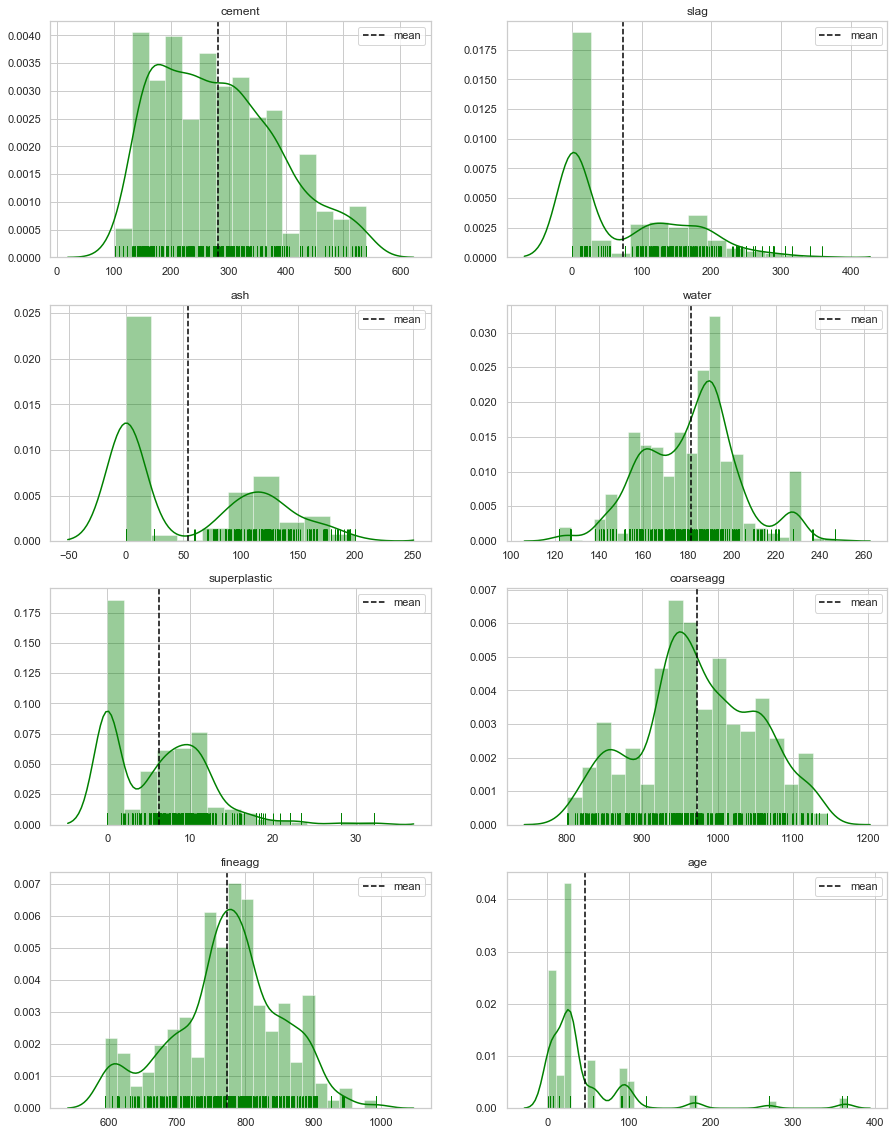

In [11]:
import itertools

cols = [i for i in concrete_df.columns if i != 'strength']

fig = plt.figure(figsize=(15, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(concrete_df[i],color='green',rug=True)
    plt.axvline(concrete_df[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
    plt.xlabel("")

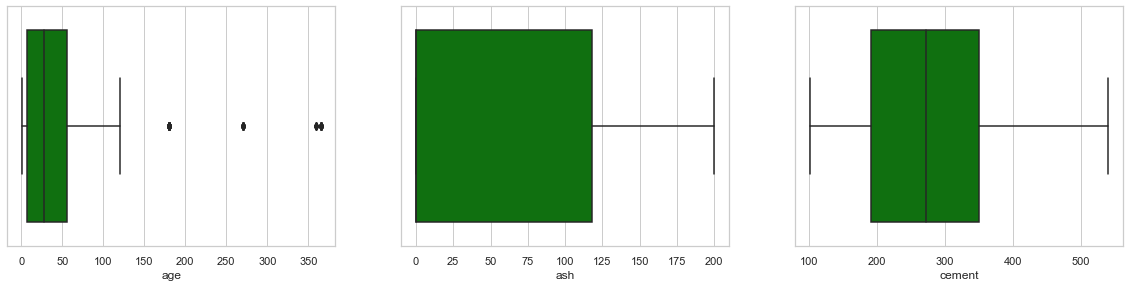

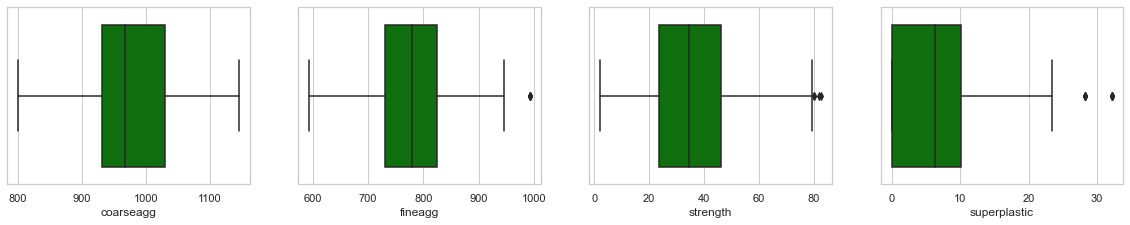

In [12]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= concrete_df.age, color='green')

plt.subplot(3,3,2)
sns.boxplot(x= concrete_df.ash, color='green')

plt.subplot(3,3,3)
sns.boxplot(x= concrete_df.cement, color='green')

plt.show()

plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= concrete_df.coarseagg, color='green')

plt.subplot(4,4,2)
sns.boxplot(x= concrete_df.fineagg, color='green')

plt.subplot(4,4,3)
sns.boxplot(x= concrete_df.strength, color='green')

plt.subplot(4,4,4)
sns.boxplot(x= concrete_df.superplastic, color='green')


plt.show()

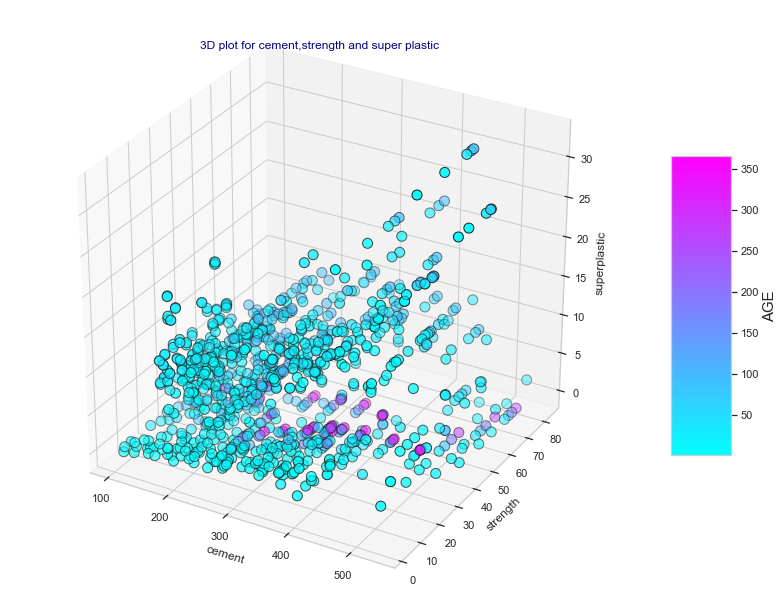

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,11))

ax  = fig.gca(projection = "3d")
#plt.subplot(111,projection = "3d") 

plot =  ax.scatter(concrete_df["cement"],
           concrete_df["strength"],
           concrete_df["superplastic"],
           linewidth=1,edgecolor ="k",
           c=concrete_df["age"],s=100,cmap="cool")

ax.set_xlabel("cement")
ax.set_ylabel("strength")
ax.set_zlabel("superplastic")

lab = fig.colorbar(plot,shrink=.5,aspect=5)
lab.set_label("AGE",fontsize = 15)

plt.title("3D plot for cement,strength and super plastic",color="navy")
plt.show()

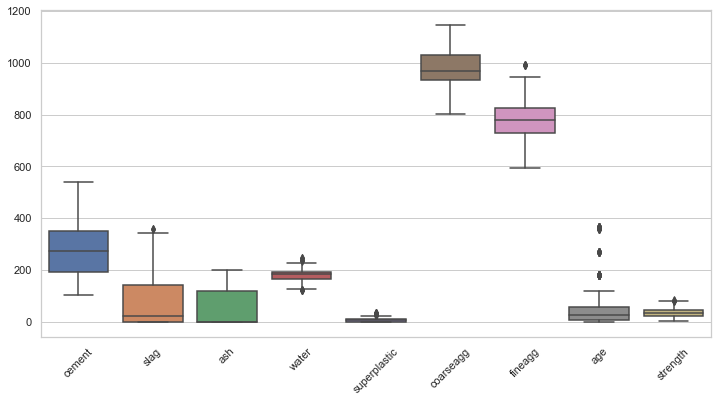

In [14]:
plt.subplots(figsize=(12, 6))
ax = sns.boxplot(data=concrete_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

In [15]:

from scipy.stats import zscore
import scipy.stats as stats
#Let's check Skew in all numercial attributes
Skewness = pd.DataFrame({'Skewness' : [stats.skew(concrete_df.cement),
                                       stats.skew(concrete_df.slag),
                                       stats.skew(concrete_df.ash),
                                       stats.skew(concrete_df.water),
                                       stats.skew(concrete_df.superplastic),
                                       stats.skew(concrete_df.coarseagg),
                                       stats.skew(concrete_df.fineagg),
                                       stats.skew(concrete_df.age),
                                       stats.skew(concrete_df.strength)]},
                        index=['cement','slag','ash', 'water', 'superplastic', 'coarseagg', 'fineagg','age','strength'])  # Measure the skeweness of the required columns
Skewness 


Skewness
cement        0.508739
slag          0.799550
ash           0.536571
water         0.074520
superplastic  0.905881
coarseagg    -0.040161
fineagg      -0.252641
age           3.264415
strength      0.416370

## 1.1 Univariate Analysis  

### Description of indepedant variables

### Variable 1-Cement

In [16]:
print('Range of values: ', concrete_df['cement'].max()-concrete_df['cement'].min())

Range of values:  438.0


In [17]:
#Central values 
print('Minimum age: ', concrete_df['cement'].min())
print('Maximum age: ',concrete_df['cement'].max())
print('Mean value: ', concrete_df['cement'].mean())
print('Median value: ',concrete_df['cement'].median())
print('Standard deviation: ', concrete_df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536


In [18]:
#Quartiles
Q1=concrete_df['cement'].quantile(q=0.25)
Q3=concrete_df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [19]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [20]:
print('Number of outliers in cement upper : ', concrete_df[concrete_df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower : ', concrete_df[concrete_df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(concrete_df[concrete_df['cement']>586.4375]['cement'].count()*100/len(concrete_df)), '%')
print('% of Outlier in cement lower: ',round(concrete_df[concrete_df['cement']<-44.0625]['cement'].count()*100/len(concrete_df)), '%')

Number of outliers in cement upper :  0
Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


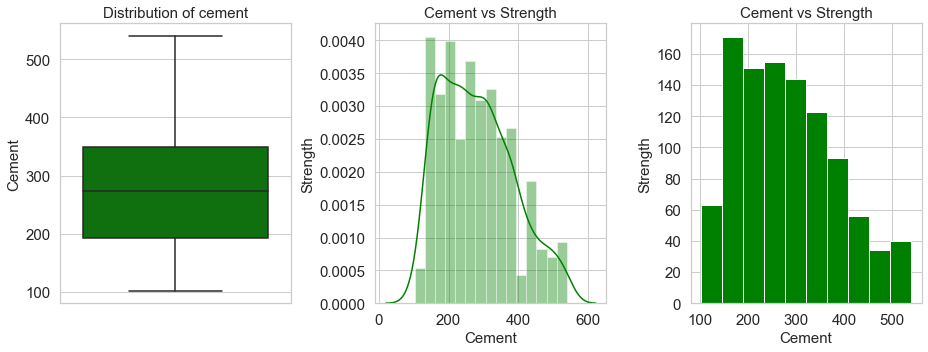

In [21]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))
#boxplot
sns.boxplot(x='cement',data=concrete_df,orient='v',ax=ax1,color='green')
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['cement'],ax=ax2,color='green')
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['cement'],color='green')
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Variable2-Slag

In [22]:
print('Range of values: ', concrete_df['slag'].max()-concrete_df['slag'].min())

Range of values:  359.4


In [23]:
print('Minimum slag: ', concrete_df['slag'].min())
print('Maximum slag: ',concrete_df['slag'].max())
print('Mean value: ', concrete_df['slag'].mean())
print('Median value: ',concrete_df['slag'].median())
print('Standard deviation: ', concrete_df['slag'].std())
print('Null values: ',concrete_df['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  359.4
Mean value:  73.89582524271844
Median value:  22.0
Standard deviation:  86.2793417481054
Null values:  False


In [24]:
Q1=concrete_df['slag'].quantile(q=0.25)
Q3=concrete_df['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  142.95
Interquartile range (IQR) is  142.95


In [25]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -214.42499999999998
Upper outliers in slag:  357.375


In [26]:
print('Number of outliers in slag upper : ', concrete_df[concrete_df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', concrete_df[concrete_df['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(concrete_df[concrete_df['slag']>357.375]['slag'].count()*100/len(concrete_df)), '%')
print('% of Outlier in slag lower: ',round(concrete_df[concrete_df['slag']<-214.425]['slag'].count()*100/len(concrete_df)), '%')

Number of outliers in slag upper :  2
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


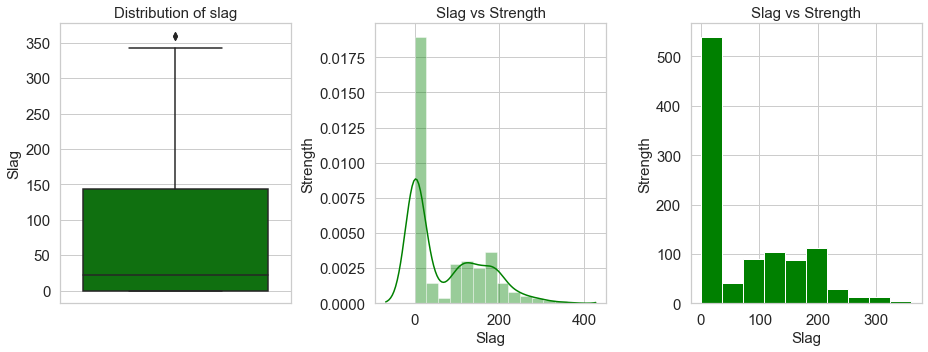

In [27]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='slag',data=concrete_df,orient='v',ax=ax1,color='green')
ax1.set_ylabel('Slag', fontsize=15)
ax1.set_title('Distribution of slag', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['slag'],ax=ax2,color='green')
ax2.set_xlabel('Slag', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Slag vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['slag'],color='green')
ax3.set_xlabel('Slag', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Slag vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Variable 3- Ash

In [28]:
print('Range of values: ', concrete_df['ash'].max()-concrete_df['ash'].min())

Range of values:  200.1


In [29]:
print('Minimum ash: ', concrete_df['ash'].min())
print('Maximum ash: ',concrete_df['ash'].max())
print('Mean value: ', concrete_df['ash'].mean())
print('Median value: ',concrete_df['ash'].median())
print('Standard deviation: ', concrete_df['ash'].std())

Minimum ash:  0.0
Maximum ash:  200.1
Mean value:  54.188349514563086
Median value:  0.0
Standard deviation:  63.99700415268794


In [30]:
Q1=concrete_df['ash'].quantile(q=0.25)
Q3=concrete_df['ash'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['ash']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [31]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in ash: ', L_outliers)
print('Upper outliers in ash: ', U_outliers)

Lower outliers in ash:  -177.45
Upper outliers in ash:  295.75


In [32]:
print('Number of outliers in ash upper : ', concrete_df[concrete_df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower : ', concrete_df[concrete_df['ash']<-177.45]['ash'].count())
print('% of Outlier in ash upper: ',round(concrete_df[concrete_df['ash']>295.75]['ash'].count()*100/len(concrete_df)), '%')
print('% of Outlier in ash lower: ',round(concrete_df[concrete_df['ash']<-177.45]['ash'].count()*100/len(concrete_df)), '%')

Number of outliers in ash upper :  0
Number of outliers in ash lower :  0
% of Outlier in ash upper:  0.0 %
% of Outlier in ash lower:  0.0 %


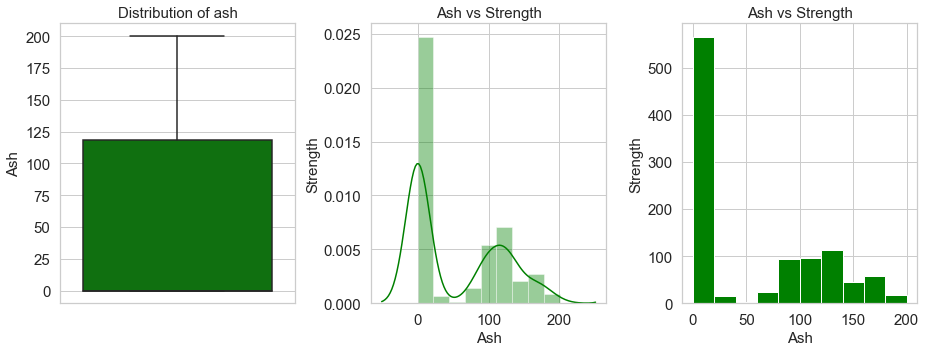

In [33]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ash',data=concrete_df,orient='v',ax=ax1,color='green')
ax1.set_ylabel('Ash', fontsize=15)
ax1.set_title('Distribution of ash', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['ash'],ax=ax2,color='green')
ax2.set_xlabel('Ash', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Ash vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['ash'],color='green')
ax3.set_xlabel('Ash', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Ash vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Variable4-Water

In [34]:
print('Range of values: ', concrete_df['water'].max()-concrete_df['water'].min())


Range of values:  125.2


In [35]:
#Central values
print('Minimum water: ', concrete_df['water'].min())
print('Maximum water: ',concrete_df['water'].max())
print('Mean value: ', concrete_df['water'].mean())
print('Median value: ',concrete_df['water'].median())
print('Standard deviation: ', concrete_df['water'].std())
print('Null values: ',concrete_df['water'].isnull().any())

Minimum water:  121.8
Maximum water:  247.0
Mean value:  181.56728155339798
Median value:  185.0
Standard deviation:  21.35421856503245
Null values:  False


In [36]:
#Quartiles
Q1=concrete_df['water'].quantile(q=0.25)
Q3=concrete_df['water'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['water']))

1st Quartile (Q1) is:  164.9
3st Quartile (Q3) is:  192.0
Interquartile range (IQR) is  27.099999999999994


In [37]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in water: ', L_outliers)
print('Upper outliers in water: ', U_outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [38]:
print('Number of outliers in water upper : ', concrete_df[concrete_df['water']>232.65]['water'].count())
print('Number of outliers in water lower : ', concrete_df[concrete_df['water']<124.25]['water'].count())
print('% of Outlier in water upper: ',round(concrete_df[concrete_df['water']>232.65]['water'].count()*100/len(concrete_df)), '%')
print('% of Outlier in water lower: ',round(concrete_df[concrete_df['water']<124.25]['water'].count()*100/len(concrete_df)), '%')

Number of outliers in water upper :  4
Number of outliers in water lower :  5
% of Outlier in water upper:  0.0 %
% of Outlier in water lower:  0.0 %


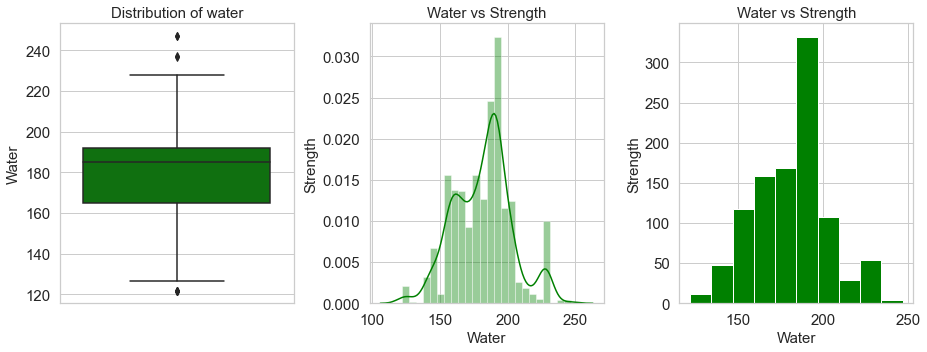

In [39]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='water',data=concrete_df,orient='v',ax=ax1,color='green')
ax1.set_ylabel('Water', fontsize=15)
ax1.set_title('Distribution of water', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['water'],ax=ax2,color='green')
ax2.set_xlabel('Water', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Water vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['water'],color='green')
ax3.set_xlabel('Water', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Water vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Variable-5 Superplastic

In [40]:
print('Range of values: ', concrete_df['superplastic'].max()-concrete_df['superplastic'].min())

Range of values:  32.2


In [41]:
print('Minimum superplastic: ', concrete_df['superplastic'].min())
print('Maximum superplastic: ',concrete_df['superplastic'].max())
print('Mean value: ', concrete_df['superplastic'].mean())
print('Median value: ',concrete_df['superplastic'].median())
print('Standard deviation: ', concrete_df['superplastic'].std())
print('Null values: ',concrete_df['superplastic'].isnull().any())

Minimum superplastic:  0.0
Maximum superplastic:  32.2
Mean value:  6.204660194174756
Median value:  6.4
Standard deviation:  5.973841392485508
Null values:  False


In [42]:
Q1=concrete_df['superplastic'].quantile(q=0.25)
Q3=concrete_df['superplastic'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['superplastic']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  10.2
Interquartile range (IQR) is  10.2


In [43]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in superplastic: ', L_outliers)
print('Upper outliers in superplastic: ', U_outliers)

Lower outliers in superplastic:  -15.299999999999999
Upper outliers in superplastic:  25.5


In [44]:
print('Number of outliers in superplastic upper : ', concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count())
print('Number of outliers in superplastic lower : ', concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count())
print('% of Outlier in superplastic upper: ',round(concrete_df[concrete_df['superplastic']>25.5]['superplastic'].count()*100/len(concrete_df)), '%')
print('% of Outlier in superplastic lower: ',round(concrete_df[concrete_df['superplastic']<-15.3]['superplastic'].count()*100/len(concrete_df)), '%')

Number of outliers in superplastic upper :  10
Number of outliers in superplastic lower :  0
% of Outlier in superplastic upper:  1.0 %
% of Outlier in superplastic lower:  0.0 %


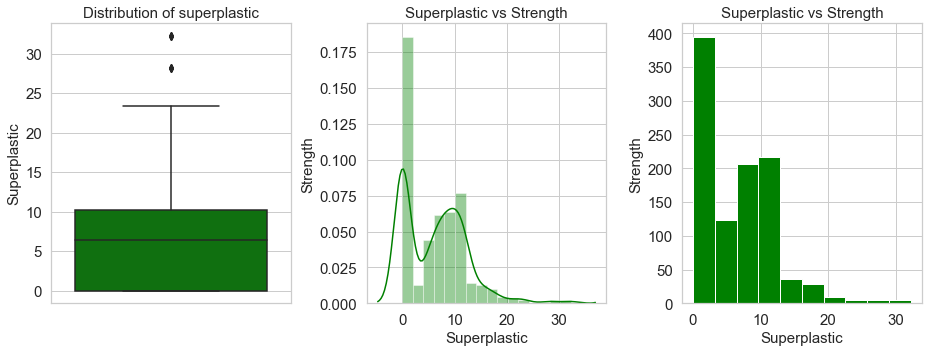

In [45]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='superplastic',data=concrete_df,orient='v',ax=ax1,color='green')
ax1.set_ylabel('Superplastic', fontsize=15)
ax1.set_title('Distribution of superplastic', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['superplastic'],ax=ax2,color='green')
ax2.set_xlabel('Superplastic', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Superplastic vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['superplastic'],color='green')
ax3.set_xlabel('Superplastic', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Superplastic vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Variable 6- Coarseagg

In [46]:
print('Range of values: ', concrete_df['coarseagg'].max()-concrete_df['coarseagg'].min())

Range of values:  344.0


In [47]:
print('Minimum value: ', concrete_df['coarseagg'].min())
print('Maximum value: ',concrete_df['coarseagg'].max())
print('Mean value: ', concrete_df['coarseagg'].mean())
print('Median value: ',concrete_df['coarseagg'].median())
print('Standard deviation: ', concrete_df['coarseagg'].std())
print('Null values: ',concrete_df['coarseagg'].isnull().any())

Minimum value:  801.0
Maximum value:  1145.0
Mean value:  972.918932038835
Median value:  968.0
Standard deviation:  77.75395396672087
Null values:  False


In [48]:
Q1=concrete_df['coarseagg'].quantile(q=0.25)
Q3=concrete_df['coarseagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['coarseagg']))

1st Quartile (Q1) is:  932.0
3st Quartile (Q3) is:  1029.4
Interquartile range (IQR) is  97.40000000000009


In [49]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in coarseagg: ', L_outliers)
print('Upper outliers in coarseagg: ', U_outliers)

Lower outliers in coarseagg:  785.8999999999999
Upper outliers in coarseagg:  1175.5000000000002


In [50]:
print('Number of outliers in coarseagg upper : ', concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count())
print('Number of outliers in coarseagg lower : ', concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count())
print('% of Outlier in coarseagg upper: ',round(concrete_df[concrete_df['coarseagg']>1175.5]['coarseagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in coarseagg lower: ',round(concrete_df[concrete_df['coarseagg']<785.9]['coarseagg'].count()*100/len(concrete_df)), '%')

Number of outliers in coarseagg upper :  0
Number of outliers in coarseagg lower :  0
% of Outlier in coarseagg upper:  0.0 %
% of Outlier in coarseagg lower:  0.0 %


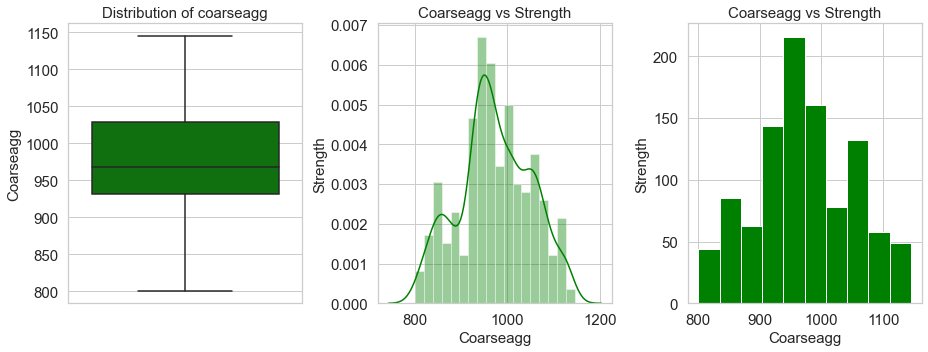

In [51]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='coarseagg',data=concrete_df,orient='v',ax=ax1,color='green')
ax1.set_ylabel('Coarseagg', fontsize=15)
ax1.set_title('Distribution of coarseagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['coarseagg'],ax=ax2,color='green')
ax2.set_xlabel('Coarseagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Coarseagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['coarseagg'],color='green')
ax3.set_xlabel('Coarseagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Coarseagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

# Variable 7-Fineagg

In [52]:
print('Range of values: ', concrete_df['fineagg'].max()-concrete_df['fineagg'].min())


Range of values:  398.6


In [53]:
print('Minimum value: ', concrete_df['fineagg'].min())
print('Maximum value: ',concrete_df['fineagg'].max())
print('Mean value: ', concrete_df['fineagg'].mean())
print('Median value: ',concrete_df['fineagg'].median())
print('Standard deviation: ', concrete_df['fineagg'].std())
print('Null values: ',concrete_df['fineagg'].isnull().any())

Minimum value:  594.0
Maximum value:  992.6
Mean value:  773.5804854368932
Median value:  779.5
Standard deviation:  80.17598014240443
Null values:  False


In [54]:
Q1=concrete_df['fineagg'].quantile(q=0.25)
Q3=concrete_df['fineagg'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['fineagg']))

1st Quartile (Q1) is:  730.9499999999999
3st Quartile (Q3) is:  824.0
Interquartile range (IQR) is  93.05000000000007


In [55]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in fineagg: ', L_outliers)
print('Upper outliers in fineagg: ', U_outliers)

Lower outliers in fineagg:  591.3749999999998
Upper outliers in fineagg:  963.575


In [56]:
print('Number of outliers in fineagg upper : ', concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count())
print('Number of outliers in fineagg lower : ', concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count())
print('% of Outlier in fineagg upper: ',round(concrete_df[concrete_df['fineagg']>963.575]['fineagg'].count()*100/len(concrete_df)), '%')
print('% of Outlier in fineagg lower: ',round(concrete_df[concrete_df['fineagg']<591.37]['fineagg'].count()*100/len(concrete_df)), '%')

Number of outliers in fineagg upper :  5
Number of outliers in fineagg lower :  0
% of Outlier in fineagg upper:  0.0 %
% of Outlier in fineagg lower:  0.0 %


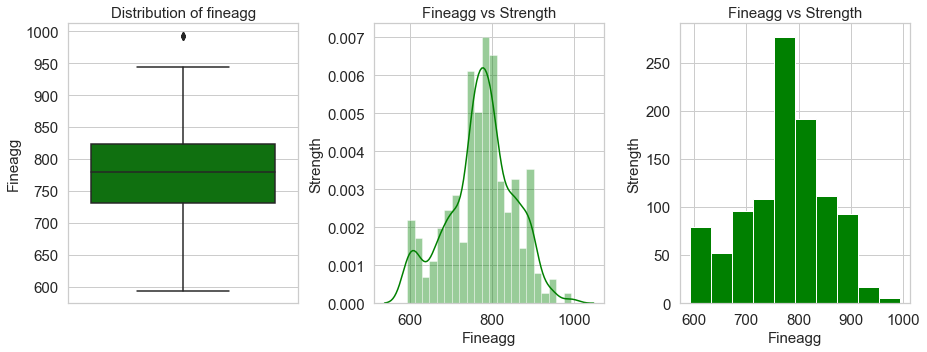

In [57]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='fineagg',data=concrete_df,orient='v',ax=ax1,color='green')
ax1.set_ylabel('Fineagg', fontsize=15)
ax1.set_title('Distribution of fineagg', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['fineagg'],ax=ax2,color='green')
ax2.set_xlabel('Fineagg', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Fineagg vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['fineagg'],color='green')
ax3.set_xlabel('Fineagg', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Fineagg vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## Variable 8-Age

In [58]:
print('Range of values: ', concrete_df['age'].max()-concrete_df['age'].min())


Range of values:  364


In [59]:
print('Minimum age: ', concrete_df['age'].min())
print('Maximum age: ',concrete_df['age'].max())
print('Mean value: ', concrete_df['age'].mean())
print('Median value: ',concrete_df['age'].median())
print('Standard deviation: ', concrete_df['age'].std())
print('Null values: ',concrete_df['age'].isnull().any())

Minimum age:  1
Maximum age:  365
Mean value:  45.662135922330094
Median value:  28.0
Standard deviation:  63.16991158103279
Null values:  False


In [60]:
Q1=concrete_df['age'].quantile(q=0.25)
Q3=concrete_df['age'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(concrete_df['age']))

1st Quartile (Q1) is:  7.0
3st Quartile (Q3) is:  56.0
Interquartile range (IQR) is  49.0


In [61]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in age: ', L_outliers)
print('Upper outliers in age: ', U_outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [62]:
print('Number of outliers in age upper : ', concrete_df[concrete_df['age']>129.5]['age'].count())
print('Number of outliers in age lower : ', concrete_df[concrete_df['age']<-66.5]['age'].count())
print('% of Outlier in age upper: ',round(concrete_df[concrete_df['age']>129.5]['age'].count()*100/len(concrete_df)), '%')
print('% of Outlier in age lower: ',round(concrete_df[concrete_df['age']<-66.5]['age'].count()*100/len(concrete_df)), '%')

Number of outliers in age upper :  59
Number of outliers in age lower :  0
% of Outlier in age upper:  6.0 %
% of Outlier in age lower:  0.0 %


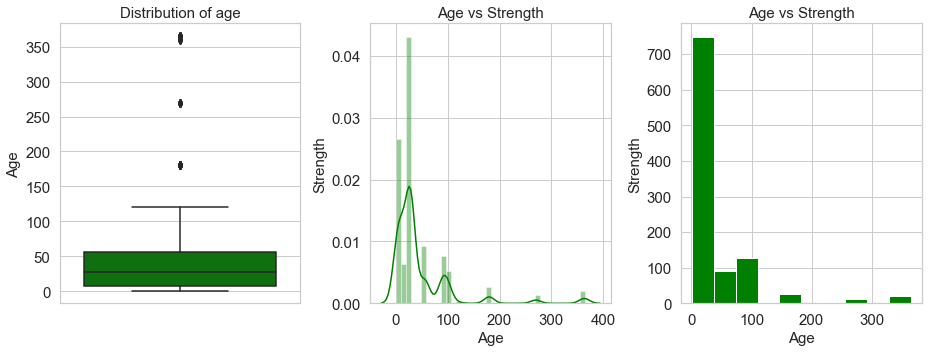

In [63]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='age',data=concrete_df,orient='v',ax=ax1,color='green')
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Distribution of age', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(concrete_df['age'],ax=ax2,color='green')
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Age vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(concrete_df['age'],color='green')
ax3.set_xlabel('Age', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Age vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

## 3.2 MultiVariate Analysis

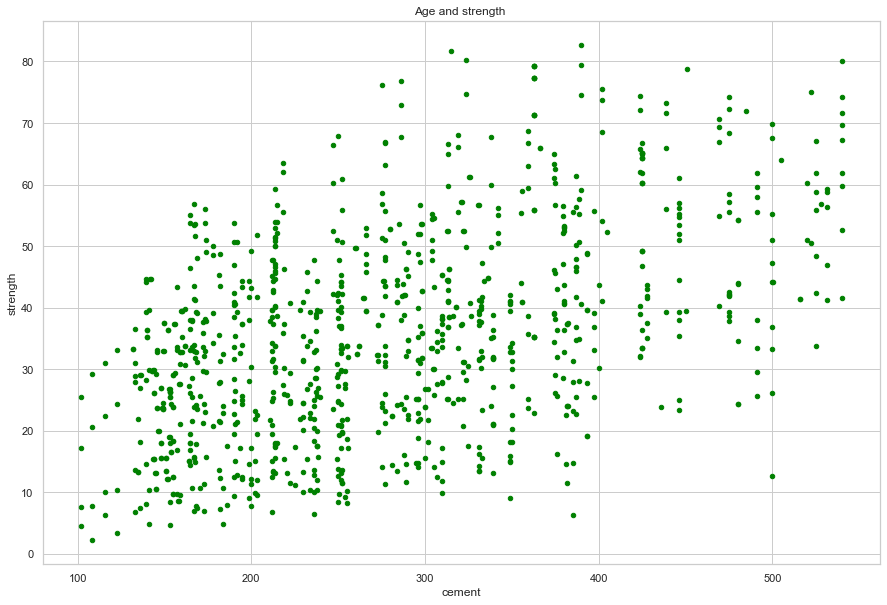

In [64]:
scatter_age_balance = concrete_df.plot.scatter('cement','strength',figsize = (15,10),color='green')
plt.title('Age and strength ')
plt.show()

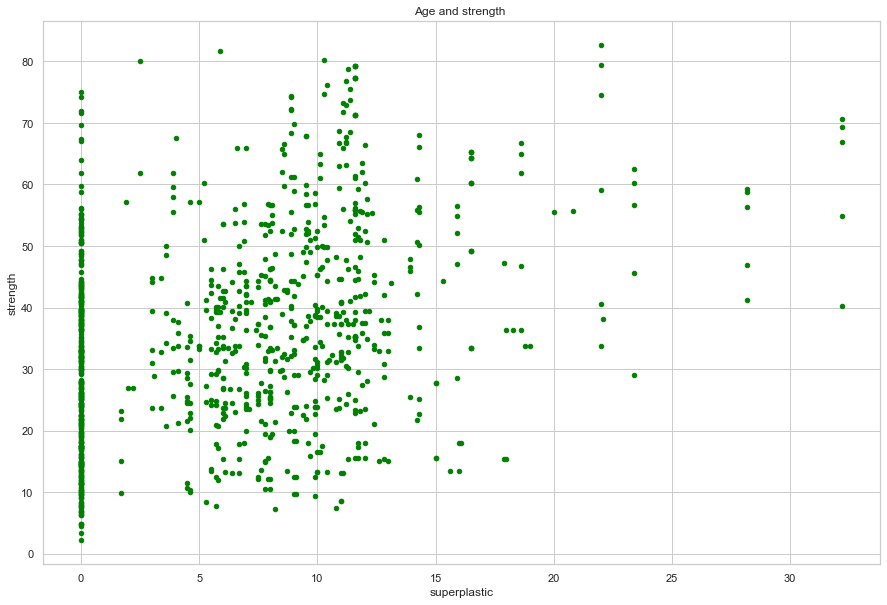

In [65]:
scatter_age_balance = concrete_df.plot.scatter('superplastic','strength',figsize = (15,10),color='green')
plt.title('Age and strength ')
plt.show()

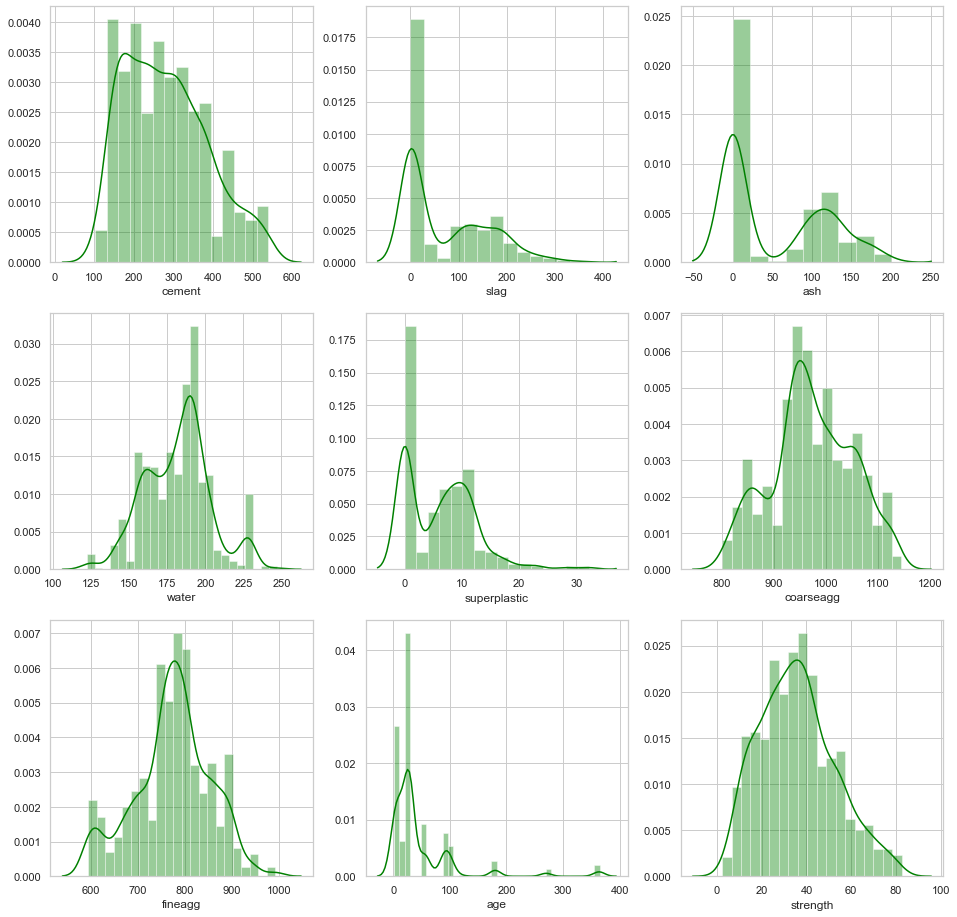

In [66]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(concrete_df['cement'],ax=ax2[0][0],color='green')
sns.distplot(concrete_df['slag'],ax=ax2[0][1],color='green')
sns.distplot(concrete_df['ash'],ax=ax2[0][2],color='green')
sns.distplot(concrete_df['water'],ax=ax2[1][0],color='green')
sns.distplot(concrete_df['superplastic'],ax=ax2[1][1],color='green')
sns.distplot(concrete_df['coarseagg'],ax=ax2[1][2],color='green')
sns.distplot(concrete_df['fineagg'],ax=ax2[2][0],color='green')
sns.distplot(concrete_df['age'],ax=ax2[2][1],color='green')
sns.distplot(concrete_df['strength'],ax=ax2[2][2],color='green')

**Observation**

We can see observe that :

1. cement is almost normal.
2. slag has three gausssians and rightly skewed.
3. ash has two gaussians and rightly skewed.
4. water has three guassians and slighly left skewed.
5. superplastic has two gaussians and rightly skewed.
6. coarseagg has three guassians and almost normal.
7. fineagg has almost two guassians and looks like normal.
8. age has multiple guassians and rightly skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280960B8460>,
      dtype=object)

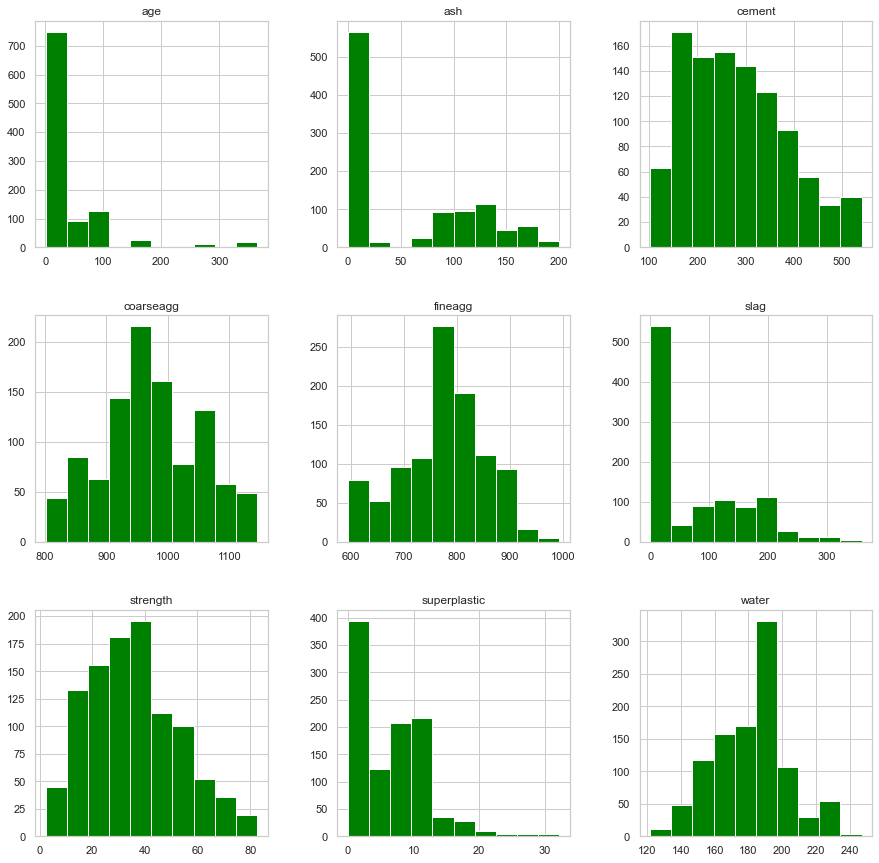

In [67]:
# Histogram
concrete_df.hist(figsize=(15,15),color='green')


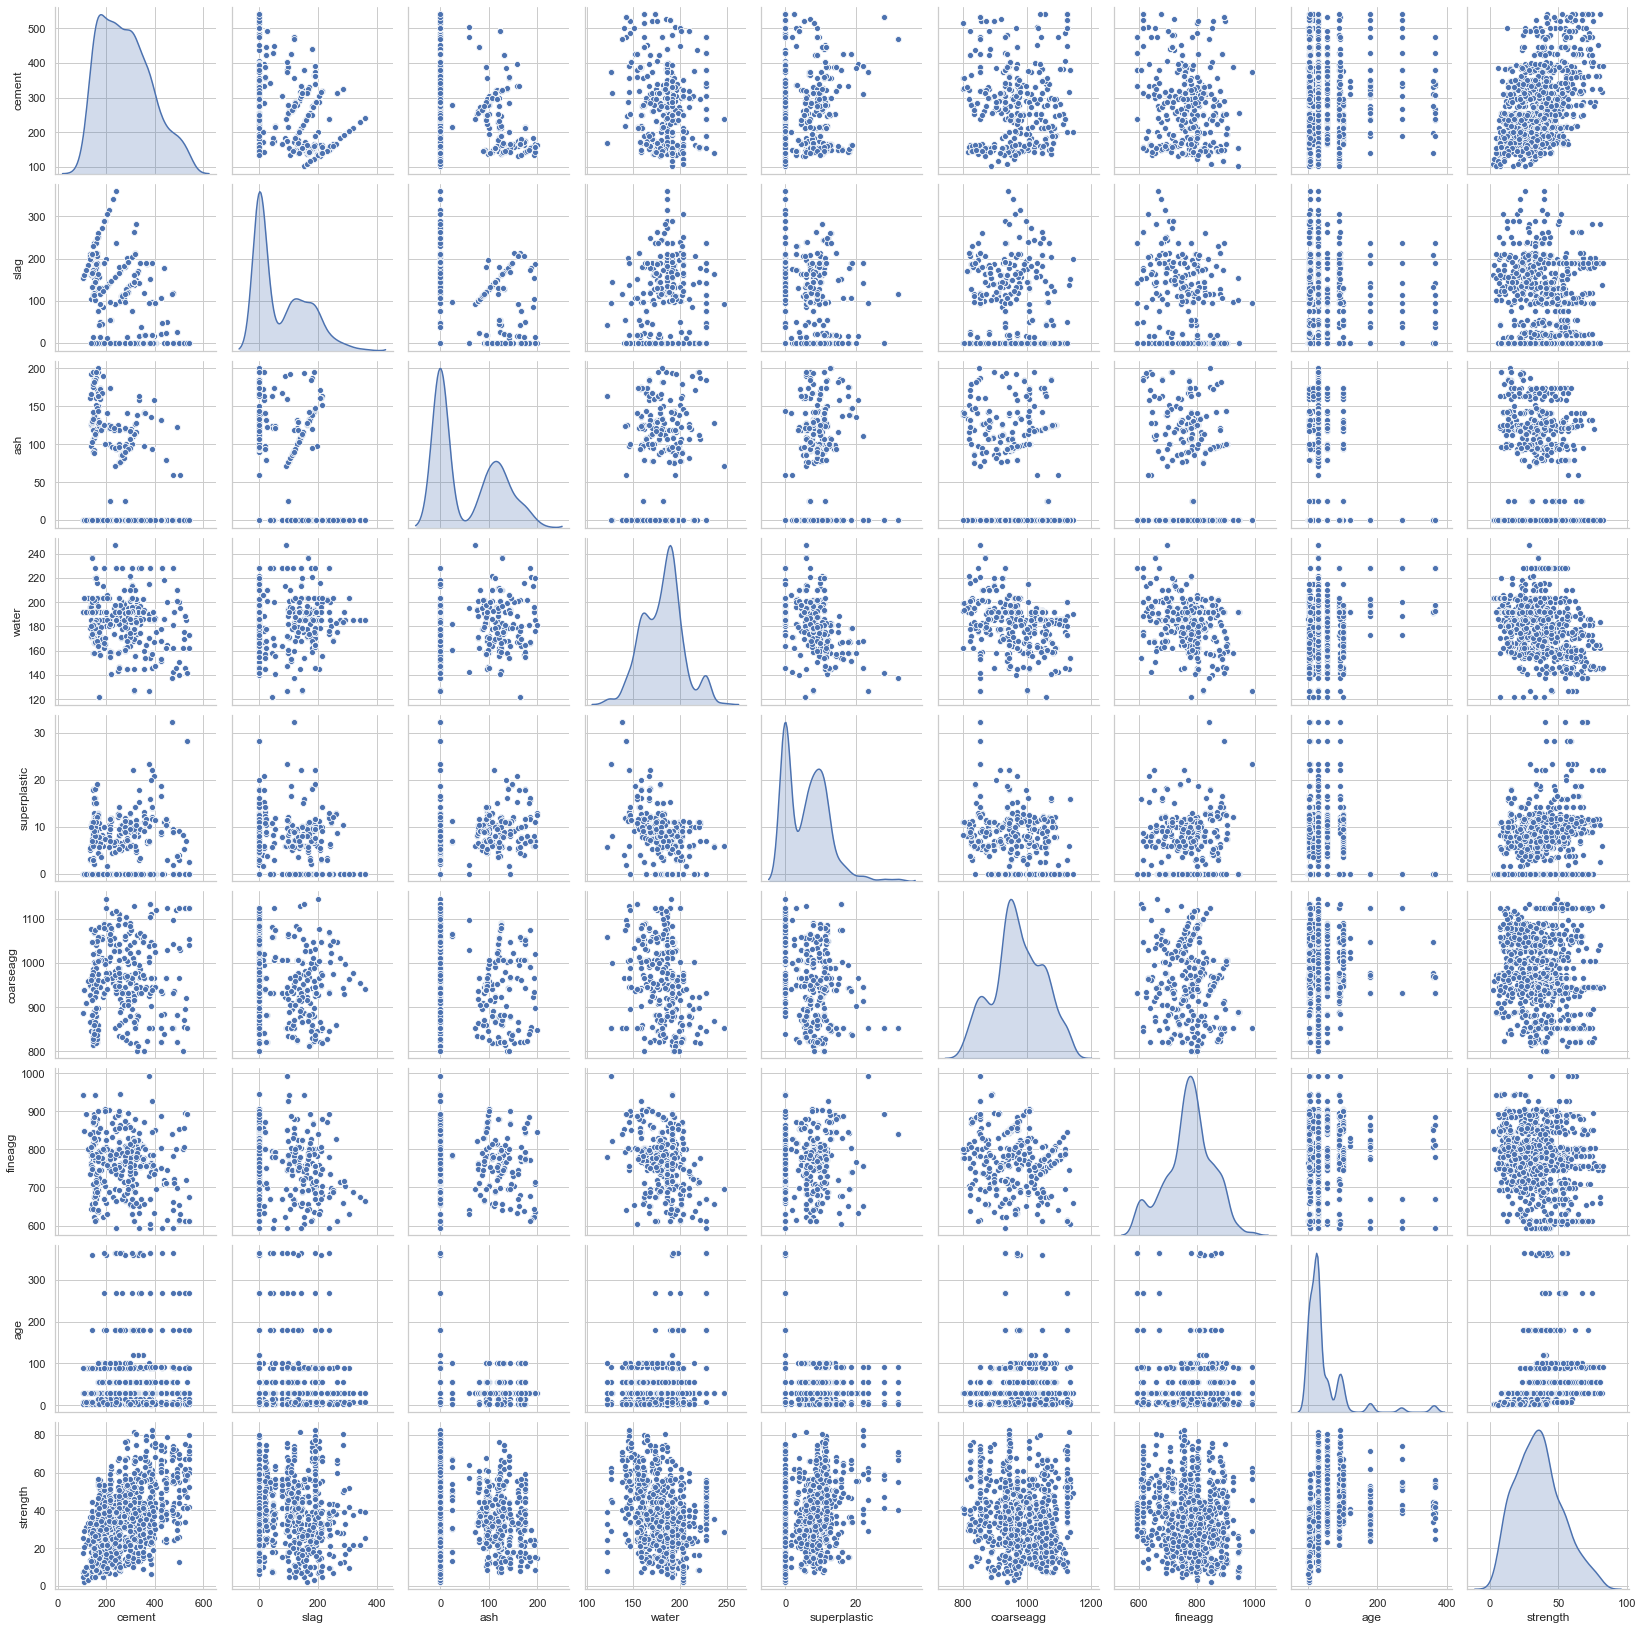

In [68]:
## pairplot- plot density curve instead of histogram in diagonal

sns.pairplot(concrete_df, diag_kind='kde')

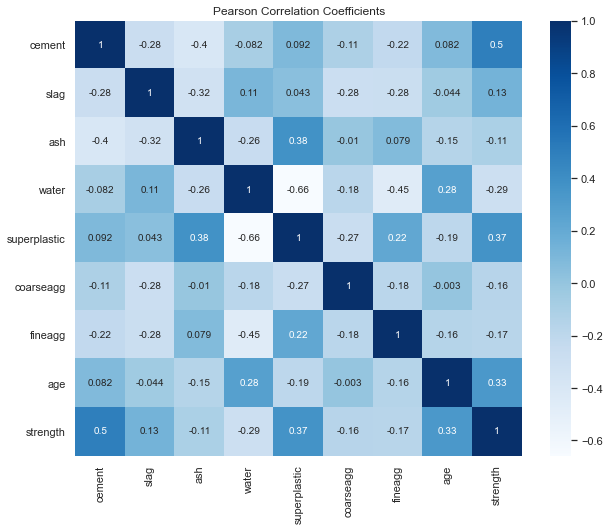

In [69]:
corr = concrete_df.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title('Pearson Correlation Coefficients')
plt.show()

In [70]:
corr_sorted = corr.unstack().sort_values(kind='quicksort', ascending = False)

In [71]:
print(corr_sorted[corr_sorted!=1].head(10))
print(corr_sorted[corr_sorted!=1].tail(10))

cement        strength        0.497832
strength      cement          0.497832
ash           superplastic    0.377503
superplastic  ash             0.377503
              strength        0.366079
strength      superplastic    0.366079
age           strength        0.328873
strength      age             0.328873
water         age             0.277618
age           water           0.277618
dtype: float64
strength      water          -0.289633
water         strength       -0.289633
slag          ash            -0.323580
ash           slag           -0.323580
              cement         -0.397467
cement        ash            -0.397467
fineagg       water          -0.450661
water         fineagg        -0.450661
superplastic  water          -0.657533
water         superplastic   -0.657533
dtype: float64


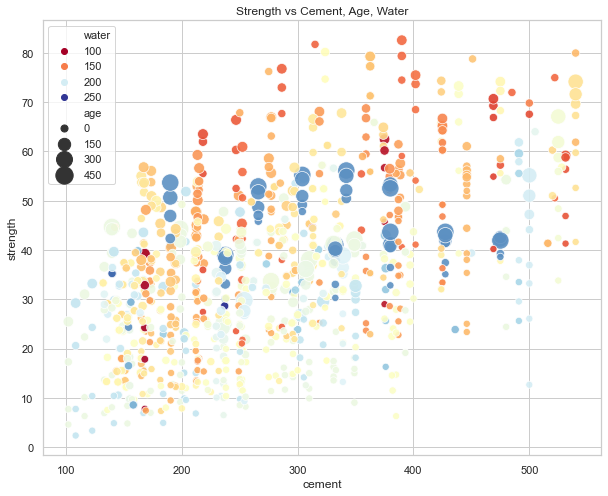

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="cement", hue="water", size="age", data=concrete_df, ax=ax, sizes=(50, 300),
                palette='RdYlBu', alpha=0.9)
ax.set_title("Strength vs Cement, Age, Water")
ax.legend()
plt.show()

Strength correlates positively with cement

Strength correlates positively with Age, though less than cement

Older Cement tends to require more Water, as shown by the larger green data points

Strength correlates negatively with Water

High Strength with a low Age requires more cement

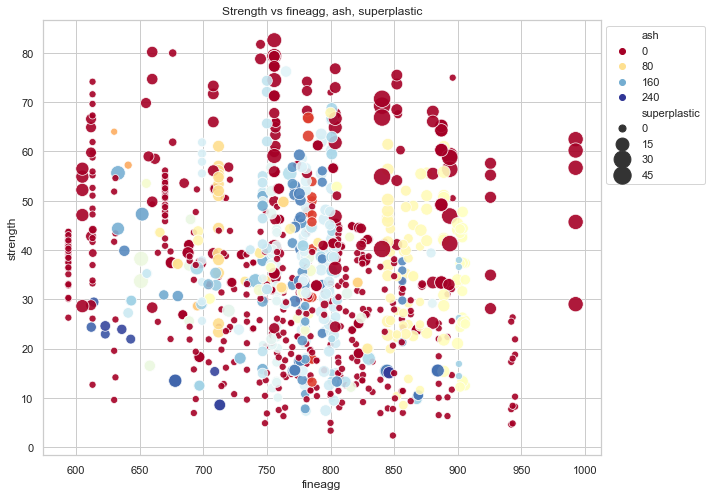

In [73]:
fig, ax = plt.subplots(figsize=(10,8))
sns.scatterplot(y="strength", x="fineagg", hue="ash", size="superplastic", data=concrete_df, ax=ax, sizes=(50, 300),
                palette='RdYlBu', alpha=0.9)
ax.set_title("Strength vs fineagg, ash, superplastic")
ax.legend(loc="upper left", bbox_to_anchor=(1,1)) # Moved outside the chart so it doesn't cover any data
plt.show()

strength correlates negatively withFly Ash

strength correlates positively with Superplastic

1. cement attribute have almost normal curve.
2. slag has two gausssians and rightly skewed.It shows the presence of outlies.
3. ash has two gaussians and rightly skewed.It shows the presence of outlies.
4. water has atleast guassians and slighly left skewed.It shows the presence of outlies.
5. superplastic has multiple gaussians and rightly skewed.It shows the presence of outlies.
6. coarseagg has three guassians and almost normal.
7. fineagg has almost two guassians and looks like normal.
8. age has multiple guassians and rightly skewed. It shows the presence of outlies.
9. strength is close to a normal curve.
10. We not only have missing values problem but also outliers problem in the dataset.

1. cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. 

2. slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. 

3. ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. 

4. water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg.


5. superplastic vs other independent attributes:This attribute have negative linear relationship with water only. 


6. coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes.


7. fineagg vs other independent attributes:It has negative linear relationship with water.


#### strength attribute : Relationship between dependent and independent attributes

strength vs cement: It is linearly related to the cement. The relationship is positive and we can see that for a given value of cement we have a multiple values of strength. Hence Cement though it has positive relationship with the strength, it is not a very good predictor. It is a weak predictor.

strength vs slag: There is no particular trend.

strength vs slag: There is also no particular trend.

strength vs age: For a given value of age, we have different values of strength. Hence, It is not a good predictor.

strength vs superplastic:For a given value of age, we have different values of strength. Hence, It is not a good predictor.

Other attributes does not give any strong relationship with strength.

Hence, we can see that none of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So,no need to use  Linear model

In [74]:
# corrlation matrix 
cor=concrete_df.corr()
cor

cement      slag       ash     water  superplastic  coarseagg  \
cement        1.000000 -0.275216 -0.397467 -0.081587      0.092386  -0.109349   
slag         -0.275216  1.000000 -0.323580  0.107252      0.043270  -0.283999   
ash          -0.397467 -0.323580  1.000000 -0.256984      0.377503  -0.009961   
water        -0.081587  0.107252 -0.256984  1.000000     -0.657533  -0.182294   
superplastic  0.092386  0.043270  0.377503 -0.657533      1.000000  -0.265999   
coarseagg    -0.109349 -0.283999 -0.009961 -0.182294     -0.265999   1.000000   
fineagg      -0.222718 -0.281603  0.079108 -0.450661      0.222691  -0.178481   
age           0.081946 -0.044246 -0.154371  0.277618     -0.192700  -0.003016   
strength      0.497832  0.134829 -0.105755 -0.289633      0.366079  -0.164935   

               fineagg       age  strength  
cement       -0.222718  0.081946  0.497832  
slag         -0.281603 -0.044246  0.134829  
ash           0.079108 -0.154371 -0.105755  
water        -0.450661  0.277618 -0.289633  
superplastic  0.222691 -0.192700  0.366079  
coarseagg    -0.178481 -0.003016 -0.164935  
fineagg       1.000000 -0.156095 -0.167241  
age          -0.156095  1.000000  0.328873  
strength     -0.167241  0.328873  1.000000

Here, we can see the correlation value between the attributes.


## Data Clean-Handling missing values and Outliers

In [75]:
#Check for the missing values 
concrete_df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

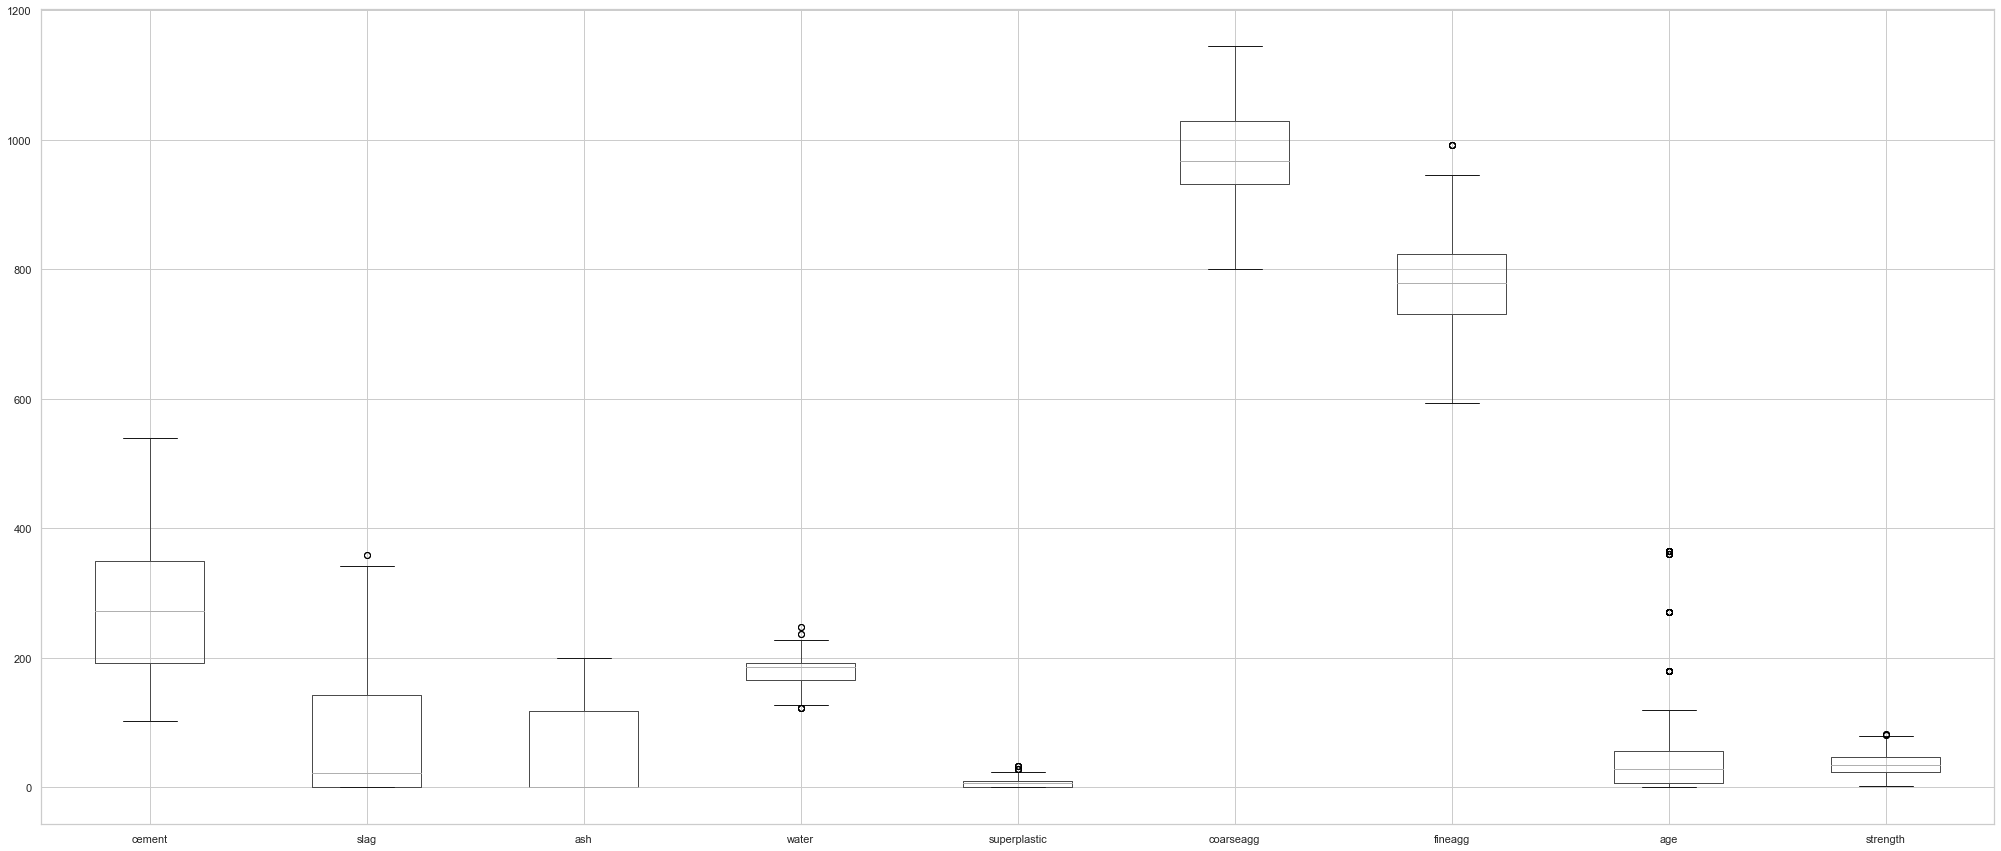

In [76]:
#Checking for outliers
concrete_df1=concrete_df.copy()
concrete_df1.boxplot(figsize=(35,15))


In [77]:
#Number of outliers present in the dataset
print('Number of outliers in cement: ',concrete_df1[((concrete_df1.cement - concrete_df1.cement.mean()) / concrete_df1.cement.std()).abs() >3]['cement'].count())
print('Number of outliers in slag: ',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'].count())
print('Number of outliers in ash: ',concrete_df1[((concrete_df1.ash - concrete_df1.ash.mean()) / concrete_df1.ash.std()).abs() >3]['ash'].count())
print('Number of outliers in water: ',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'].count())
print('Number of outliers in superplastic: ',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'].count())
print('Number of outliers in coarseagg: ',concrete_df1[((concrete_df1.coarseagg - concrete_df1.coarseagg.mean()) / concrete_df1.coarseagg.std()).abs() >3]['coarseagg'].count())
print('Number of outliers in fineagg: ',concrete_df1[((concrete_df1.fineagg - concrete_df1.fineagg.mean()) / concrete_df1.fineagg.std()).abs() >3]['fineagg'].count())
print('Number of outliers in age: ',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'].count())

Number of outliers in cement:  0
Number of outliers in slag:  4
Number of outliers in ash:  0
Number of outliers in water:  2
Number of outliers in superplastic:  10
Number of outliers in coarseagg:  0
Number of outliers in fineagg:  0
Number of outliers in age:  33


1. Here, we have used Standard deviation method to detect the outliers.If we have any data point that is more than 3 times the standard deviation, then those points are very likely to be outliers.
2. We can see that slag, water, superplastic and age contain outliers.

In [78]:
print('Records containing outliers in slag: \n',concrete_df1[((concrete_df1.slag - concrete_df1.slag.mean()) / concrete_df1.slag.std()).abs() >3]['slag'])


Records containing outliers in slag: 
 21     342.1
564    342.1
918    359.4
990    359.4
Name: slag, dtype: float64


In [79]:
print('Records containing outliers in water: \n',concrete_df1[((concrete_df1.water - concrete_df1.water.mean()) / concrete_df1.water.std()).abs() >3]['water'])


Records containing outliers in water: 
 66     247.0
263    246.9
Name: water, dtype: float64


In [80]:
print('Records containing outliers in superplastic: \n',concrete_df1[((concrete_df1.superplastic - concrete_df1.superplastic.mean()) / concrete_df1.superplastic.std()).abs() >3]['superplastic'])


Records containing outliers in superplastic: 
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


In [81]:
print('Records containing outliers in age: \n',concrete_df1[((concrete_df1.age - concrete_df1.age.mean()) / concrete_df1.age.std()).abs() >3]['age'])


Records containing outliers in age: 
 64      365
133     365
149     270
157     360
159     365
198     365
256     270
262     270
270     270
297     270
313     270
323     360
361     360
393     365
448     360
465     365
484     365
570     270
601     365
623     270
632     270
713     365
720     365
754     365
755     360
850     270
878     270
901     365
919     360
951     270
957     365
995     365
1028    270
Name: age, dtype: int64


In [82]:
#Handling the outliers

#Replacing the outliers by median
for col_name in concrete_df1.columns[:-1]:
    q1 = concrete_df1[col_name].quantile(0.25)
    q3 = concrete_df1[col_name].quantile(0.75)
    iqr = q3 - q1
    
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    concrete_df1.loc[(concrete_df1[col_name] < low) | (concrete_df1[col_name] > high), col_name] = concrete_df1[col_name].median()

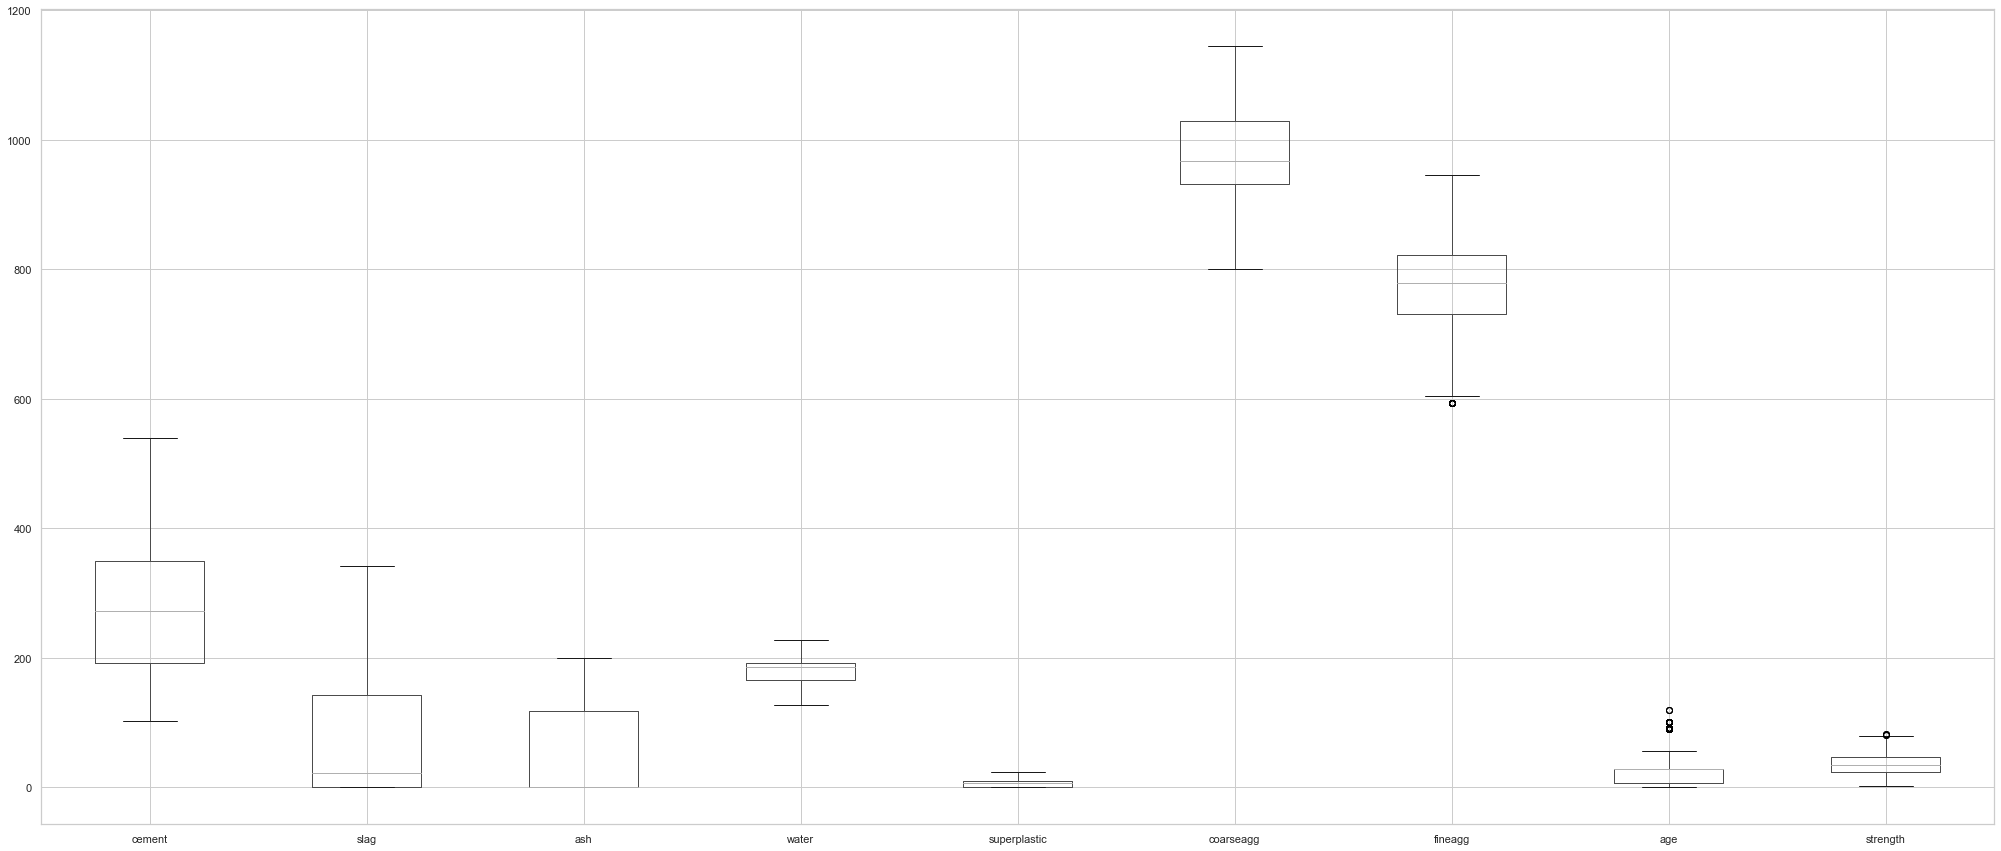

In [83]:
concrete_df1.boxplot(figsize=(35,15))


#  Feature Engineering


In [84]:
#Scaling the features
concrete_df_z = concrete_df1.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=concrete_df.columns)

Here, all the attributes in the same scale(unit) except the age attribute. Hence, we are scaling the attributes. We are using zscore for scaling.


## Polynomial Features

In [85]:
#Splitting the data into independent and dependent attributes
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

Degree: 1, Features: 9
Degree: 2, Features: 45
Degree: 3, Features: 165
Degree: 4, Features: 495
Degree: 5, Features: 1287


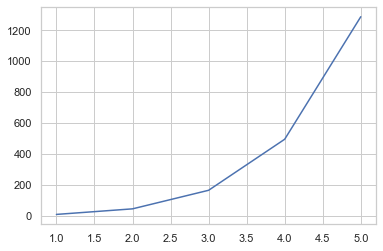

In [86]:

# compare the effect of the degree on the number of created features
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
from matplotlib import pyplot

# calculate change in number of features
num_features = list()
degress = [i for i in range(1, 6)]
for d in degress:
	# create transform
	trans = PolynomialFeatures(degree=d)
	# fit and transform
	data = trans.fit_transform(X)
	# record number of features
	num_features.append(data.shape[1])
	# summarize
	print('Degree: %d, Features: %d' % (d, data.shape[1]))
# plot degree vs number of features
pyplot.plot(degress, num_features)
pyplot.show()

In [87]:
#Splitting the data into independent and dependent attributes
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

### SPLIT DATA

In [88]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

<h1 style="color:green"><center>MODELING</center></h1>

In [89]:
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=False)

In [91]:
# Importing models
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
# Linear Regression
lr = LinearRegression()
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])
# Ridge Regression
ridge = Ridge()
piperidge = Pipeline([('polynomial_features',poly), ('logistic_regression',ridge)])

# Fitting models on Training data 
pipe.fit(X_train, y_train)
piperidge.fit(X_train, y_train)

# Making predictions on Test data
y_pred_lr = pipe.predict(X_test)
y_pred_ridge = piperidge.predict(X_test)

In [92]:
# performance on train data
print('Performance on training data using LR:',pipe.score(X_train,y_train))
# performance on test data
print('Performance on testing data using LR:',pipe.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred_lr)
print('Accuracy LR: ',acc_DT)

Performance on training data using LR: 0.8620237272650242
Performance on testing data using LR: 0.8372393147334632
Accuracy LR:  0.8372393147334632


In [93]:
#Store the accuracy results for each model in a dataframe for final comparison
results = pd.DataFrame({'Method':['LR'], 'accuracy': acc_DT},index={'1'})
results = results[['Method', 'accuracy']]
results

Method  accuracy
1     LR  0.837239

In [94]:
# performance on train data
print('Performance on training data using ridge:',piperidge.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ridge:',piperidge.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred_ridge)
print('Accuracy ridge: ',acc_DT)

Performance on training data using ridge: 0.8617910786074274
Performance on testing data using ridge: 0.8372200260400355
Accuracy ridge:  0.8372200260400355


In [95]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['ridge'], 'accuracy': acc_DT},index={'1'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1     LR  0.837239
1  ridge  0.837220

# DecisionTree Regression


##### using Pipeline concept for DT ...

In [96]:
#Adding into Pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from category_encoders import OrdinalEncoder

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

clf_pipeline = Pipeline(steps=[('polynomial_features',poly),
                      ('classifier', DecisionTreeRegressor())])

In [97]:
clf_pipeline.fit(X_train , y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('classifier', DecisionTreeRegressor())])

1. So, cement, age and water are significant attributes.
2. Here, ash, coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength column. This we have seen in pairplot also.

In [98]:
y_pred = clf_pipeline.predict(X_test)
# performance on train data
print('Performance on training data using DT:',clf_pipeline.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',clf_pipeline.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9917907420889983
Performance on testing data using DT: 0.8205435898106846
Accuracy DT:  0.8205435898106846


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


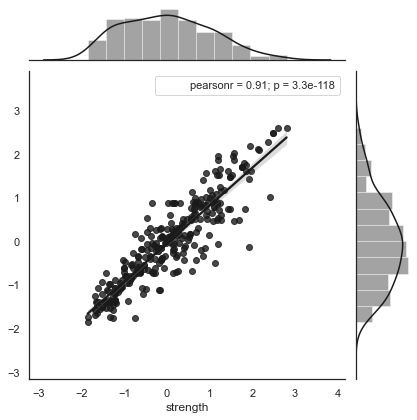

In [99]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [100]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1             LR  0.837239
1          ridge  0.837220
1  Decision Tree  0.820544

## K fold cross validation


In [101]:
num_folds = 20
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(clf_pipeline,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.8077634078459418
Standard Deviation:  0.0689293244883728


In [102]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                    LR  0.837239
1                 ridge  0.837220
1         Decision Tree  0.820544
2  Decision Tree k fold  0.807763

## --- Step 2----

**Drop the least significant variable**


In [103]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   float64
 8   strength      1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


In [104]:
#Create a copy of the dataset
concrete_df2=concrete_df_z.copy()


In [105]:
#independent and dependent variable
X = concrete_df2.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df2['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [106]:
dt_model = Pipeline(steps=[('polynomial_features',poly),
                      ('classifier', DecisionTreeRegressor())])
dt_model.fit(X_train , y_train)

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('classifier', DecisionTreeRegressor())])

In [107]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data using DT: 0.9910459656545207
Performance on testing data using DT: 0.8074492395022477
Accuracy DT:  0.8074492395022477


**it is an overfit model.**


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


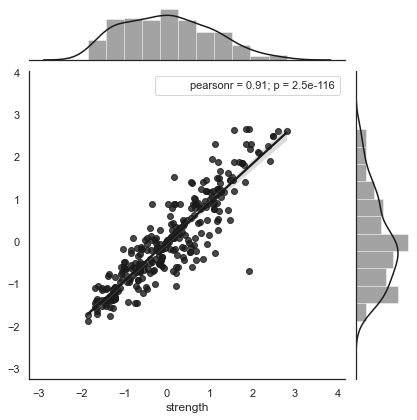

In [108]:
from scipy.stats import pearsonr
sns.set(style="darkgrid", color_codes=True)   
with sns.axes_style("white"):
    sns.jointplot(x=y_test, y=y_pred, stat_func=pearsonr,kind="reg", color="k");

In [109]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                    LR  0.837239
1                 ridge  0.837220
1         Decision Tree  0.820544
2  Decision Tree k fold  0.807763
3        Decision Tree2  0.807449

## Regularising/Pruning of Decision Tree


In [110]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [111]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [112]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns))


                   Imp
cement        0.416953
slag          0.025822
ash           0.000000
water         0.135128
superplastic  0.017987
coarseagg     0.000000
fineagg       0.007793
age           0.396318


Here, we can see that ash,coarseagg and fineagg are least significant variable.


**Visualizing the Regularized Tree**


In [113]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)

Performance on training data using DT: 0.7255811799299219
Performance on testing data using DT: 0.6548277186105129
Accuracy DT:  0.6548277186105129


In [114]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree'], 'accuracy': [acc_RDT]},index={'4'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                    LR  0.837239
1                 ridge  0.837220
1         Decision Tree  0.820544
2  Decision Tree k fold  0.807763
3        Decision Tree2  0.807449
4  Pruned Decision Tree  0.654828

## K fold cross validation


In [115]:
num_folds = 20
seed = 42
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(reg_dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.6785562583989007
Standard Deviation:  0.085398758170893


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [116]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree k fold'], 'accuracy': [accuracy]},index={'5'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                           LR  0.837239
1                        ridge  0.837220
1                Decision Tree  0.820544
2         Decision Tree k fold  0.807763
3               Decision Tree2  0.807449
4         Pruned Decision Tree  0.654828
5  Pruned Decision Tree k fold  0.678556

## Iteration2


In [117]:
#Create a copy of the dataset
concrete_df3=concrete_df_z.copy()

In [118]:
#independent and dependent variable
X = concrete_df3.drop( ['strength','ash','coarseagg','fineagg'] , axis=1)
y = concrete_df3['strength']
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)
X_train

cement      slag     water  superplastic       age
185  0.658961 -0.858192  1.036599     -1.091166 -0.656933
286  0.888723  1.358745 -0.561016      0.753750  2.113827
600 -0.039901 -0.858192  0.453882     -1.091166 -1.052756
691  0.946164  0.254963  2.250592     -1.091166 -0.908821
474  0.716401 -0.858192  0.551002      0.918148 -0.153159
..        ...       ...       ...           ...       ...
960 -0.281152 -0.858192 -1.726449      1.173879 -1.052756
847 -1.112126 -0.858192 -0.866942     -1.091166 -1.052756
715  0.214753  0.781076  1.546476      0.041357 -0.153159
905  0.352610 -0.858192  1.376517      0.004824 -0.153159
235 -0.432412 -0.858192  0.599562     -1.091166 -1.052756

[721 rows x 5 columns]

In [119]:
# Regularizing the Decision tree classifier and fitting the model
reg_dt_model = DecisionTreeRegressor( max_depth = 4,random_state=1,min_samples_leaf=5)
reg_dt_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [120]:
y_pred = reg_dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',reg_dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',reg_dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RDT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RDT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.7249584363084667
Performance on testing data using DT: 0.6634677033758938
Accuracy DT:  0.6634677033758938
MSE:  0.35129266754854116


In [121]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Pruned Decision Tree2'], 'accuracy': [acc_RDT]},index={'6'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                           LR  0.837239
1                        ridge  0.837220
1                Decision Tree  0.820544
2         Decision Tree k fold  0.807763
3               Decision Tree2  0.807449
4         Pruned Decision Tree  0.654828
5  Pruned Decision Tree k fold  0.678556
6        Pruned Decision Tree2  0.663468

## Random Forest

In [122]:
poly = PolynomialFeatures(degree = 1, interaction_only=False, include_bias=False)

In [123]:
model=  Pipeline(steps=[('polynomial_features',poly),
                      ('classifier', RandomForestRegressor())])

model.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('classifier', RandomForestRegressor())])

In [124]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9787934350529346
Performance on testing data using RFR: 0.9025734680280466
Accuracy DT:  0.9025734680280466
MSE:  0.10169967830653412


In [125]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'7'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                           LR  0.837239
1                        ridge  0.837220
1                Decision Tree  0.820544
2         Decision Tree k fold  0.807763
3               Decision Tree2  0.807449
4         Pruned Decision Tree  0.654828
5  Pruned Decision Tree k fold  0.678556
6        Pruned Decision Tree2  0.663468
7      Random Forest Regressor  0.902573

In [126]:
X_train

cement      slag     water  superplastic       age
185  0.658961 -0.858192  1.036599     -1.091166 -0.656933
286  0.888723  1.358745 -0.561016      0.753750  2.113827
600 -0.039901 -0.858192  0.453882     -1.091166 -1.052756
691  0.946164  0.254963  2.250592     -1.091166 -0.908821
474  0.716401 -0.858192  0.551002      0.918148 -0.153159
..        ...       ...       ...           ...       ...
960 -0.281152 -0.858192 -1.726449      1.173879 -1.052756
847 -1.112126 -0.858192 -0.866942     -1.091166 -1.052756
715  0.214753  0.781076  1.546476      0.041357 -0.153159
905  0.352610 -0.858192  1.376517      0.004824 -0.153159
235 -0.432412 -0.858192  0.599562     -1.091166 -1.052756

[721 rows x 5 columns]

## K fold cross validation


In [127]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.9123786570232781
Standard Deviation:  0.026225908917428407


In [128]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'8'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                              LR  0.837239
1                           ridge  0.837220
1                   Decision Tree  0.820544
2            Decision Tree k fold  0.807763
3                  Decision Tree2  0.807449
4            Pruned Decision Tree  0.654828
5     Pruned Decision Tree k fold  0.678556
6           Pruned Decision Tree2  0.663468
7         Random Forest Regressor  0.902573
8  Random Forest Regressor k fold  0.912379

## Gradient Boosting Regressor


In [129]:
model=  Pipeline(steps=[('polynomial_features',poly),
                      ('classifier', GradientBoostingRegressor())])
model.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('classifier', GradientBoostingRegressor())])

In [130]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9378780229101811
Performance on testing data using GBR: 0.8802472823882413
Accuracy DT:  0.8802472823882413
MSE:  0.12500509472055368


In [131]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'9'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                              LR  0.837239
1                           ridge  0.837220
1                   Decision Tree  0.820544
2            Decision Tree k fold  0.807763
3                  Decision Tree2  0.807449
4            Pruned Decision Tree  0.654828
5     Pruned Decision Tree k fold  0.678556
6           Pruned Decision Tree2  0.663468
7         Random Forest Regressor  0.902573
8  Random Forest Regressor k fold  0.912379
9        Gradient Boost Regressor  0.880247

## K fold cross validation


In [132]:
num_folds = 20
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.8899732084671635
Standard Deviation:  0.030381528569887847


In [133]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'10'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                                LR  0.837239
1                             ridge  0.837220
1                     Decision Tree  0.820544
2              Decision Tree k fold  0.807763
3                    Decision Tree2  0.807449
4              Pruned Decision Tree  0.654828
5       Pruned Decision Tree k fold  0.678556
6             Pruned Decision Tree2  0.663468
7           Random Forest Regressor  0.902573
8    Random Forest Regressor k fold  0.912379
9          Gradient Boost Regressor  0.880247
10  Gradient Boost Regressor k fold  0.889973

### Bagging Regressor

In [134]:
model=  Pipeline(steps=[('polynomial_features',poly),
                      ('classifier', BaggingRegressor())])
model.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('classifier', BaggingRegressor())])

In [135]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9721452925097825
Performance on testing data using GBR: 0.8925980360088176
Accuracy DT:  0.8925980360088176
MSE:  0.11211263468289728


In [136]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['BaggingRegressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                                LR  0.837239
1                             ridge  0.837220
1                     Decision Tree  0.820544
2              Decision Tree k fold  0.807763
3                    Decision Tree2  0.807449
4              Pruned Decision Tree  0.654828
5       Pruned Decision Tree k fold  0.678556
6             Pruned Decision Tree2  0.663468
7           Random Forest Regressor  0.902573
8    Random Forest Regressor k fold  0.912379
9          Gradient Boost Regressor  0.880247
10  Gradient Boost Regressor k fold  0.889973
11                 BaggingRegressor  0.892598

## Ada Boosting Regressor


In [137]:
model=  Pipeline(steps=[('polynomial_features',poly),
                      ('classifier', AdaBoostRegressor())])
model.fit(X_train, y_train)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('classifier', AdaBoostRegressor())])

In [138]:
y_pred = model.predict(X_test)
# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_ABR=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_ABR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.811457782401104
Performance on testing data using GBR: 0.7560816332149205
Accuracy DT:  0.7560816332149205
MSE:  0.2546166730253616


In [139]:
X_train

cement      slag     water  superplastic       age
185  0.658961 -0.858192  1.036599     -1.091166 -0.656933
286  0.888723  1.358745 -0.561016      0.753750  2.113827
600 -0.039901 -0.858192  0.453882     -1.091166 -1.052756
691  0.946164  0.254963  2.250592     -1.091166 -0.908821
474  0.716401 -0.858192  0.551002      0.918148 -0.153159
..        ...       ...       ...           ...       ...
960 -0.281152 -0.858192 -1.726449      1.173879 -1.052756
847 -1.112126 -0.858192 -0.866942     -1.091166 -1.052756
715  0.214753  0.781076  1.546476      0.041357 -0.153159
905  0.352610 -0.858192  1.376517      0.004824 -0.153159
235 -0.432412 -0.858192  0.599562     -1.091166 -1.052756

[721 rows x 5 columns]

In [140]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor'], 'accuracy': [acc_ABR]},index={'11'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results

Method  accuracy
1                                LR  0.837239
1                             ridge  0.837220
1                     Decision Tree  0.820544
2              Decision Tree k fold  0.807763
3                    Decision Tree2  0.807449
4              Pruned Decision Tree  0.654828
5       Pruned Decision Tree k fold  0.678556
6             Pruned Decision Tree2  0.663468
7           Random Forest Regressor  0.902573
8    Random Forest Regressor k fold  0.912379
9          Gradient Boost Regressor  0.880247
10  Gradient Boost Regressor k fold  0.889973
11                 BaggingRegressor  0.892598
11           Ada Boosting Regressor  0.756082

##  K fold cross validation


In [141]:
num_folds = 18
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Average accuracy:  0.7695735283036467
Standard Deviation:  0.04345343789114762


In [142]:
tempResultsDf = pd.DataFrame({'Method':['Ada Boosting Regressor k fold'], 'accuracy': [accuracy]},index={'12'})
results = pd.concat([results, tempResultsDf])
results = results[['Method', 'accuracy']]
results.sort_values(by='accuracy', ascending=False)

Method  accuracy
8    Random Forest Regressor k fold  0.912379
7           Random Forest Regressor  0.902573
11                 BaggingRegressor  0.892598
10  Gradient Boost Regressor k fold  0.889973
9          Gradient Boost Regressor  0.880247
1                                LR  0.837239
1                             ridge  0.837220
1                     Decision Tree  0.820544
2              Decision Tree k fold  0.807763
3                    Decision Tree2  0.807449
12    Ada Boosting Regressor k fold  0.769574
11           Ada Boosting Regressor  0.756082
5       Pruned Decision Tree k fold  0.678556
6             Pruned Decision Tree2  0.663468
4              Pruned Decision Tree  0.654828

In [143]:
X_train

cement      slag     water  superplastic       age
185  0.658961 -0.858192  1.036599     -1.091166 -0.656933
286  0.888723  1.358745 -0.561016      0.753750  2.113827
600 -0.039901 -0.858192  0.453882     -1.091166 -1.052756
691  0.946164  0.254963  2.250592     -1.091166 -0.908821
474  0.716401 -0.858192  0.551002      0.918148 -0.153159
..        ...       ...       ...           ...       ...
960 -0.281152 -0.858192 -1.726449      1.173879 -1.052756
847 -1.112126 -0.858192 -0.866942     -1.091166 -1.052756
715  0.214753  0.781076  1.546476      0.041357 -0.153159
905  0.352610 -0.858192  1.376517      0.004824 -0.153159
235 -0.432412 -0.858192  0.599562     -1.091166 -1.052756

[721 rows x 5 columns]

#### Observation 

After applying all the models we can see that Random Forest Regressor, Random Forest Regressor k fold, Gradient Boost Regressor, Gradient Boost Regressor k fold, Bagging Regressor are giving better results as compared to other models.


------------------------------------------------------------------------------------------

### Creating the Model and Tuning It:

Techniques employed to squeeze that extra performance out of the model without making it overfit. Use Grid Search or Random Search on any of the two models used above. Make a DataFrame to compare models after hyperparameter tuning and their metrics as above. (15 marks)

<center>Apply GridsearchCV</center>

### FOR RandomForestRegressor

In [144]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [10],
    'max_features': ['log2'],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [5,10],
    'n_estimators': np.arange(50, 71)
}
rfg = RandomForestRegressor(random_state = 7)

grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel());
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 69}

In [145]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = grid_search.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:", rfTree_train_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_df = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9550928941371706
Random Forest Regressor Model RMSE : 0.3444234060190306
Random Forest Regressor Model R-Square Value : 0.8681244142496977


Trainng Score      RMSE  R Squared
0       0.955093  0.344423   0.868124

### FOR GradientBoostingRegressor

In [146]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid={'n_estimators':[100,500], 
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] } 
rfg =  GradientBoostingRegressor(n_estimators=50)

grid_search = GridSearchCV(estimator = rfg, param_grid = param_grid, 
                          cv = kfold, n_jobs = 1, verbose = 0, return_train_score=True)

grid_search.fit(X_train, y_train.values.ravel());

In [147]:
# best ensemble model (with optimal combination of hyperparameters)
rfTree = grid_search.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Graident Boosting Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Graident Boosting Model Training Set Score:", rfTree_train_score)

rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Graident Boosting Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Graident Boosting Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_gf = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_gf

Graident Boosting Regressor
Graident Boosting Model Training Set Score: 0.9846838339128497
Graident Boosting Regressor Model RMSE : 0.30118675629884584
Graident Boosting Regressor Model R-Square Value : 0.9001157609274549


Trainng Score      RMSE  R Squared
0       0.984684  0.301187   0.900116

In [148]:
finalResults = pd.concat([rfTree_random_model_df, rfTree_random_model_gf])
finalResults

Trainng Score      RMSE  R Squared
0       0.955093  0.344423   0.868124
0       0.984684  0.301187   0.900116

### RandomSearchCV

### For RandomForestRegressor

In [149]:
rf = RandomForestRegressor(random_state = 7)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}


In [150]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 3)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)

{'n_estimators': [10, 55, 100], 'max_features': ['auto', 'log2'], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [151]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 5, scoring='neg_mean_absolute_error', 
                              cv = kfold, verbose=2, random_state=7, n_jobs=-1,
                              return_train_score=True)
# Fit the random search model
rf_random.fit(X_train, y_train.values.ravel());

Fitting 18 folds for each of 5 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    4.4s finished


In [152]:

rfTree = rf_random.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)


rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_df_rs = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df_rs

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9266000057224175
Random Forest Regressor Model RMSE : 0.36690746081563924
Random Forest Regressor Model R-Square Value : 0.8521639247362114


Trainng Score      RMSE  R Squared
0         0.9266  0.366907   0.852164

### For Gradient Boosting Regressor

In [153]:
rf = GradientBoostingRegressor(random_state = 50)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'presort': 'deprecated', 'random_state': 50, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [154]:
# Number of trees in random forest
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
n_estimators = [int(x) for x in np.linspace(start = 10 , stop = 100, num = 3)]   # returns evenly spaced 10 numbers
# Number of features to consider at every split
max_features = ['auto', 'log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 10, num = 2)]  # returns evenly spaced numbers can be changed to any
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid

parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10) 
                 }

print(parameters)

{'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028095EB9460>, 'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028095E7BC10>, 'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000280978BFDC0>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028096624D60>}


In [155]:
    randm = RandomizedSearchCV(estimator=rf, param_distributions = parameters, 
                               cv = 2, n_iter = 10, n_jobs=-1)
    randm.fit(X_train, y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(random_state=50),
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028095EB9460>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028096624D60>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x00000280978BFDC0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000028095E7BC10>})

In [156]:
  print("\n The best parameters across ALL searched params:\n",
          randm.best_params_)


 The best parameters across ALL searched params:
 {'learning_rate': 0.8095979626970053, 'max_depth': 7, 'n_estimators': 290, 'subsample': 0.979176309943589}


In [157]:
rfTree = randm.best_estimator_
rfTree.fit(X_train, y_train.values.ravel())
print('Random Forest Regressor')
rfTree_train_score = rfTree.score(X_train, y_train)
print("Random Forest Regressor Model Training Set Score:",rfTree_train_score)


rfTree_rmse = np.sqrt((-1) * cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='neg_mean_squared_error').mean())
print("Random Forest Regressor Model RMSE :", rfTree_rmse)

rfTree_r2 = cross_val_score(rfTree, X_train, y_train.values.ravel(), cv=kfold, scoring='r2').mean()
print("Random Forest Regressor Model R-Square Value :", rfTree_r2)

rfTree_random_model_gf_rs = pd.DataFrame({'Trainng Score': [rfTree_train_score],
                           'RMSE': [rfTree_rmse],
                           'R Squared': [rfTree_r2]})
rfTree_random_model_df_rs

Random Forest Regressor
Random Forest Regressor Model Training Set Score: 0.9910151847134347
Random Forest Regressor Model RMSE : 0.40916745736555227
Random Forest Regressor Model R-Square Value : 0.8117195724932513


Trainng Score      RMSE  R Squared
0         0.9266  0.366907   0.852164

In [158]:
FINAL_RESULT = pd.concat([rfTree_random_model_df, rfTree_random_model_gf,rfTree_random_model_df_rs, rfTree_random_model_gf_rs])
FINAL_RESULT
methods = ['GridSearch-RandomForestRegressor', 'GridSearch-Gradient Boosting Regressor', 
           'RandomSearch-RandomForestRegressor',
           'RandomSearch-Gradient Boosting Regressor'] 
  
FINAL_RESULT['method'] = methods 
FINAL_RESULT.sort_values(by='R Squared', ascending=False)

Trainng Score      RMSE  R Squared  \
0       0.984684  0.301187   0.900116   
0       0.955093  0.344423   0.868124   
0       0.926600  0.366907   0.852164   
0       0.991015  0.409167   0.811720   

                                     method  
0    GridSearch-Gradient Boosting Regressor  
0          GridSearch-RandomForestRegressor  
0        RandomSearch-RandomForestRegressor  
0  RandomSearch-Gradient Boosting Regressor

## Bootstrap Sampling


In [159]:
concrete_XY = X.join(y)

## Using Gradient Boosting Regressor


In [160]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    gbmTree = GradientBoostingRegressor(n_estimators=50)
    # fit against independent variables and corresponding target values
    gbmTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = gbmTree.score(test[:, :-1] , y_test)
    predictions = gbmTree.predict(test[:, :-1])  

    stats.append(score)

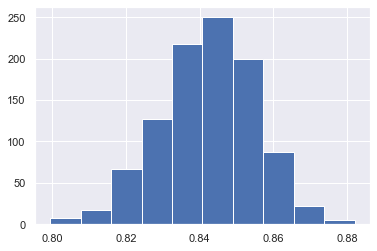

95.0 confidence interval 81.6% and 86.6%


In [161]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

## Using Random Forest Regressor


In [162]:
values = concrete_XY.values
# Number of bootstrap samples to create
n_iterations = 1000        
# size of a bootstrap sample
n_size = int(len(concrete_df_z) * 1)    

# run bootstrap
# empty list that will hold the scores for each bootstrap iteration
stats = list()   
for i in range(n_iterations):
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    
    
     # fit model
    rfTree = RandomForestRegressor(n_estimators=100)
    # fit against independent variables and corresponding target values
    rfTree.fit(train[:,:-1], train[:,-1]) 
    # Take the target column for all rows in test set

    y_test = test[:,-1]    
    # evaluate model
    # predict based on independent variables in the test data
    score = rfTree.score(test[:, :-1] , y_test)
    predictions = rfTree.predict(test[:, :-1])  

    stats.append(score)

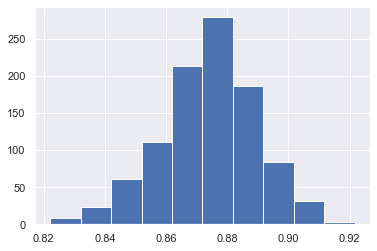

95.0 confidence interval 84.1% and 90.3%


In [163]:
# plot scores

from matplotlib import pyplot
pyplot.hist(stats)
pyplot.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

The bootstrap random forest classification model performance is between 84%-90.3% which is better than other classification algorithms.

---------------------------------

----------------------------------------------

## IN ANOTHER WAY

In [164]:
# Helper classes
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score

from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np

class Regressor(object):
    """
    Class representing a regressor. 
    Based on the parameters supplied in the constructor, this class constructs a pipeline object.
    The constructed pipeline adds 
    - Standard scalar if the scale parameter is passed as True
    - Polynomial Feature transformations if the include_polymomial flag is set as True
    """
    def __init__(self, name, model, scale=True, include_polynomial=False, degree=2):
        self.name = name
        self.model = model
        steps = []
        if scale:
            steps.append(('scaler', StandardScaler()))
        if include_polynomial:
            steps.append(('poly_features', PolynomialFeatures(degree=degree)))
        steps.append(('model', model))
        self.steps = steps

    def get_name(self):
        return self.name

    def get_model(self):
        return self.model

    def get(self):
        return Pipeline(steps=self.steps)

    def feature_imp(self):
        try:
            return self.model.feature_importances_
        except AttributeError:
            try:
                return self.model.coef_
            except AttributeError:
                return None


class ModelsBuilder(object):
    '''
    This class is responsible for building the model and constructing a results dataframe.
    It accepts several regressor objects.
    '''
    def __init__(self, regressors, data, target, test_size=0.3, seed=42):
        self.regressors = regressors
        self.split_data = train_test_split(data.drop(target, axis=1), data[target], test_size=test_size, random_state=seed)
        self.data = data
        self.target = target

    def build(self, k_fold_splits=10):
        results = pd.DataFrame(columns=['model', 'training_score', 'test_score', 'k_fold_mean', 'k_fold_std'])
        for regressor in self.regressors:
            regressor.get().fit(self.split_data[0], self.split_data[2])
            cross_vals = cross_val_score(regressor.get(), self.data.drop(self.target, axis=1), self.data[self.target], cv=KFold(n_splits=k_fold_splits))
            mean = round(cross_vals.mean(), 3)
            std = round(cross_vals.std(), 3)
            results = results.append({
                'model': regressor.get_name(),
                'training_score': round(regressor.get().score(self.split_data[0], self.split_data[2]), 3),
                'test_score': round(regressor.get().score(self.split_data[1], self.split_data[3]),3), 
                'k_fold_mean': mean, 
                'k_fold_std': std, 
                '95% confidence intervals': str(round(mean-(1.96*std),3)) + ' <-> ' + str(round(mean+(1.96*std),3))
                }, ignore_index=True)

        return results


class OutliersImputer(SimpleImputer):
    '''
    This class extends the functionality of SimpleImputer to handle outliers.
    '''
    def __init__(self, strategy='mean'):
        self.strategy = strategy
        super().__init__(strategy=strategy)

    def fit(self, X, y=None):
        for i in X.columns:
            q1, q2, q3 = X[i].quantile([0.25,0.5,0.75])
            IQR = q3 - q1
            a = X[i] > q3 + 1.5*IQR
            b = X[i] < q1 - 1.5*IQR
            X[i] = np.where(a | b, np.NaN, X[i])  
        return super().fit(X, y)

In [165]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

regressors = [
    Regressor('Linear Regression', LinearRegression(), scale=True), 
    Regressor('Linear Regression degree 2', LinearRegression(), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Linear Regression degree 3', LinearRegression(), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Ridge', Ridge(random_state=42), scale=True), 
    Regressor('Ridge degree 2', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Ridge degree 3', Ridge(random_state=42), 
              scale=True, include_polynomial=True, degree=3),
    Regressor('Lasso', Lasso(random_state=42), scale=True), 
    Regressor('Lasso degree 2', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=2),
    Regressor('Lasso degree 3', Lasso(random_state=42), 
              scale=True, include_polynomial=True, degree=3), 
    Regressor('Decision Tree', DecisionTreeRegressor(random_state=42, max_depth=4), scale=True),
    Regressor('Ada boosting', AdaBoostRegressor(random_state=42), scale=True),
    Regressor('Random forest', RandomForestRegressor(random_state=42), scale=True),
    Regressor('Gradient boosting', GradientBoostingRegressor(random_state=42), scale=True),
    Regressor('KNN', KNeighborsRegressor(n_neighbors=3), scale=True),
    Regressor('SVR', SVR(gamma='auto'), scale=True),
]

In [166]:
# Iteration 1 - Use all data
concrete_df=concrete_df_z
result = ModelsBuilder(regressors, concrete_df_z, 'strength').build()
result

model  training_score  test_score  k_fold_mean  \
0            Linear Regression           0.720       0.704        0.701   
1   Linear Regression degree 2           0.863       0.829        0.833   
2   Linear Regression degree 3           0.944       0.765        0.880   
3                        Ridge           0.720       0.704        0.701   
4               Ridge degree 2           0.863       0.830        0.832   
5               Ridge degree 3           0.939       0.866        0.883   
6                        Lasso           0.000      -0.002       -0.029   
7               Lasso degree 2           0.000      -0.002       -0.029   
8               Lasso degree 3           0.091       0.098        0.079   
9                Decision Tree           0.729       0.666        0.685   
10                Ada boosting           0.812       0.785        0.782   
11               Random forest           0.980       0.901        0.911   
12           Gradient boosting           0.946       0.867        0.899   
13                         KNN           0.888       0.768        0.796   
14                         SVR           0.909       0.864        0.869   

    k_fold_std 95% confidence intervals  
0        0.034          0.634 <-> 0.768  
1        0.031          0.772 <-> 0.894  
2        0.029          0.823 <-> 0.937  
3        0.034          0.634 <-> 0.768  
4        0.031          0.771 <-> 0.893  
5        0.027           0.83 <-> 0.936  
6        0.044         -0.115 <-> 0.057  
7        0.044         -0.115 <-> 0.057  
8        0.045         -0.009 <-> 0.167  
9        0.063          0.562 <-> 0.808  
10       0.027          0.729 <-> 0.835  
11       0.023          0.866 <-> 0.956  
12       0.016           0.868 <-> 0.93  
13       0.040          0.718 <-> 0.874  
14       0.024          0.822 <-> 0.916

In [167]:
# Iteration 2 - Ouliers treatment

# Count outliers
q1= concrete_df.quantile(0.25)
q3= concrete_df.quantile(0.75)
IQR = q3-q1
outliers = pd.DataFrame(((concrete_df > (q3+1.5*IQR)) | (concrete_df < (q1-IQR*1.5))).sum(axis=0), columns=['No. of outliers'])
outliers['Percentage of outliers'] = round(outliers['No. of outliers']*100/len(concrete_df), 2)
outliers

No. of outliers  Percentage of outliers
cement                      0                    0.00
slag                        0                    0.00
ash                         0                    0.00
water                       0                    0.00
superplastic                0                    0.00
coarseagg                   0                    0.00
fineagg                    30                    2.91
age                       131                   12.72
strength                    4                    0.39

In [168]:
concrete_df[['age','superplastic']] = OutliersImputer().fit_transform(concrete_df[['age','superplastic']])

<ipython-input-164-d2c3cfc5be78>:96: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = np.where(a | b, np.NaN, X[i])


In [169]:
data=concrete_df
result_outliers_treatment = ModelsBuilder(regressors, data, 'strength').build()
result_outliers_treatment

model  training_score  test_score  k_fold_mean  \
0            Linear Regression           0.691       0.686        0.671   
1   Linear Regression degree 2           0.830       0.801        0.794   
2   Linear Regression degree 3           0.920       0.722        0.843   
3                        Ridge           0.691       0.686        0.671   
4               Ridge degree 2           0.829       0.805        0.794   
5               Ridge degree 3           0.914       0.830        0.847   
6                        Lasso           0.000      -0.002       -0.029   
7               Lasso degree 2           0.000      -0.002       -0.029   
8               Lasso degree 3           0.160       0.155        0.128   
9                Decision Tree           0.729       0.666        0.685   
10                Ada boosting           0.805       0.769        0.755   
11               Random forest           0.979       0.895        0.904   
12           Gradient boosting           0.939       0.867        0.893   
13                         KNN           0.901       0.784        0.802   
14                         SVR           0.877       0.849        0.838   

    k_fold_std 95% confidence intervals  
0        0.044          0.585 <-> 0.757  
1        0.041          0.714 <-> 0.874  
2        0.045          0.755 <-> 0.931  
3        0.044          0.585 <-> 0.757  
4        0.041          0.714 <-> 0.874  
5        0.048          0.753 <-> 0.941  
6        0.044         -0.115 <-> 0.057  
7        0.044         -0.115 <-> 0.057  
8        0.055           0.02 <-> 0.236  
9        0.063          0.562 <-> 0.808  
10       0.036          0.684 <-> 0.826  
11       0.024          0.857 <-> 0.951  
12       0.020          0.854 <-> 0.932  
13       0.047           0.71 <-> 0.894  
14       0.040           0.76 <-> 0.916

In [170]:
# Iteration 3 - Remove features based on k-means clustering
result_feature_engg = ModelsBuilder(regressors, data.drop(['ash', 'coarseagg', 'fineagg'], axis=1), 'strength').build()
result_feature_engg

model  training_score  test_score  k_fold_mean  \
0            Linear Regression           0.683       0.676        0.664   
1   Linear Regression degree 2           0.781       0.768        0.755   
2   Linear Regression degree 3           0.851       0.833        0.820   
3                        Ridge           0.683       0.676        0.664   
4               Ridge degree 2           0.781       0.768        0.755   
5               Ridge degree 3           0.851       0.833        0.820   
6                        Lasso           0.000      -0.002       -0.029   
7               Lasso degree 2           0.000      -0.002       -0.029   
8               Lasso degree 3           0.160       0.155        0.128   
9                Decision Tree           0.729       0.666        0.690   
10                Ada boosting           0.805       0.771        0.750   
11               Random forest           0.979       0.887        0.904   
12           Gradient boosting           0.932       0.871        0.886   
13                         KNN           0.922       0.805        0.824   
14                         SVR           0.859       0.829        0.828   

    k_fold_std 95% confidence intervals  
0        0.044           0.578 <-> 0.75  
1        0.043          0.671 <-> 0.839  
2        0.046            0.73 <-> 0.91  
3        0.044           0.578 <-> 0.75  
4        0.043          0.671 <-> 0.839  
5        0.046            0.73 <-> 0.91  
6        0.044         -0.115 <-> 0.057  
7        0.044         -0.115 <-> 0.057  
8        0.055           0.02 <-> 0.236  
9        0.060          0.572 <-> 0.808  
10       0.029          0.693 <-> 0.807  
11       0.022          0.861 <-> 0.947  
12       0.018          0.851 <-> 0.921  
13       0.040          0.746 <-> 0.902  
14       0.037          0.755 <-> 0.901

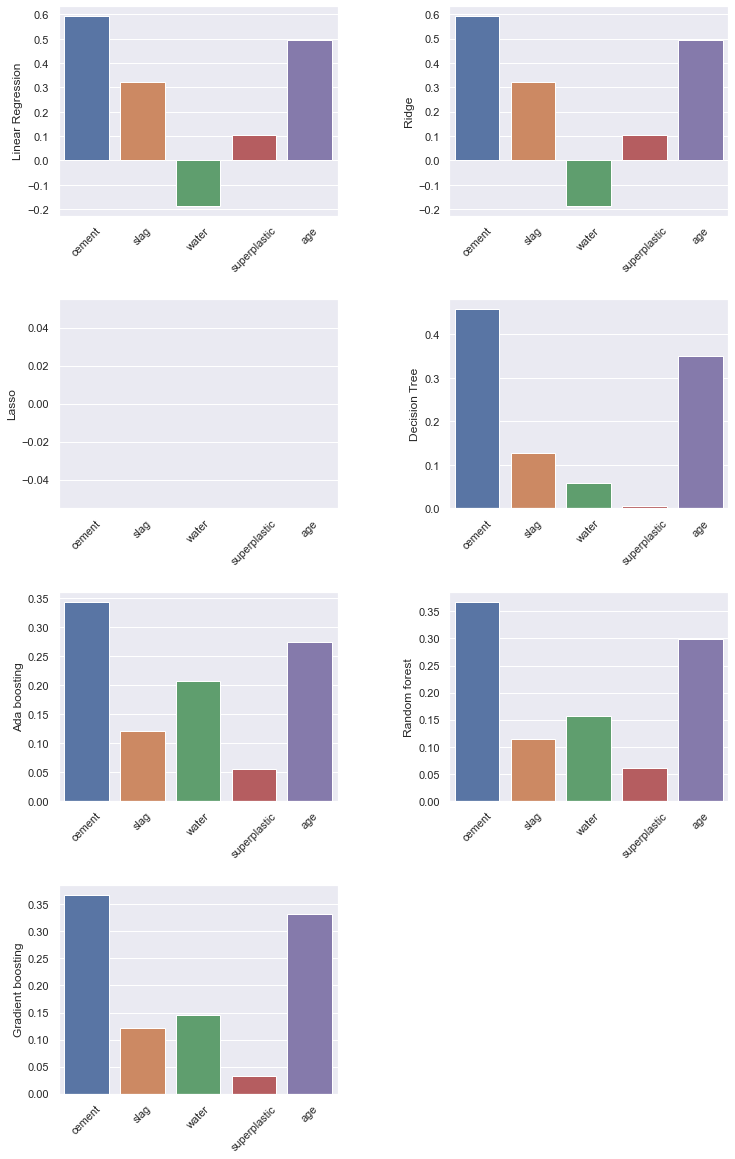

In [171]:
columns = data.drop(['ash', 'coarseagg', 'fineagg', 'strength'], axis=1).columns
feature_imp = pd.DataFrame(index=columns)
for r in regressors:
    fi = r.feature_imp()
    if fi is not None and len(fi) == len(columns):
        feature_imp[r.get_name()] = fi


plt.figure(figsize=(12, 20))
for i, col in enumerate(feature_imp.columns):
  plt.subplot(4, 2, i+1)
  ax = sns.barplot(x=feature_imp.index, y=feature_imp[col])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  plt.subplots_adjust(hspace=0.4, wspace=0.4)

<h1 style="color:green;"><center>Random Forest Algorithm has better Performance compared to others </center></h1>

-----------------------------Random Forest Algorithm has better Performance compared to others ------------------------